
# Credit Card Churn Analysis
---  

## Project Description 
In this project, I will be working with a dataset provided by **Kaggle**, where I will develop a churn-rate analysis. The goal is to identify the causes and reasons for customer churn from a banking institution in relation to credit card services. After understanding these causes and reasons, some machine learning models will be developed to predict potential customers who will be abandoning the credit card service of this institution. With these predictions, I will seek to develop solutions to prevent or reverse the churn of these customers.  

---  

### CRISP-DM Methodology  
The project will follow the CRISP-DM (*Cross-Industry Standard Process for Data Mining*) framework:  

| **Stage** | **Objective** | **Key Actions** |  
|-----------|---------------|------------------|  
| **1. Business Understanding** | Define the impact of churn prediction on customer retention. | - Identify the causes and possible solutions for the business.<br>- Align metrics with business KPIs. |  
| **2. Data Understanding** | Analyze data structure, quality, and variable relationships. | - Exploratory Data Analysis (EDA).<br>- Outlier and correlation detection. |  
| **3. Data Preparation** | Prepare data for model training. | - Split training and test data.<br>- Remove redundant variables. |  
| **4. Modeling** | Train and compare classical models and neural networks. | - Random Forest/Logistic Regression (baseline).<br>- PyTorch neural network (focus on generalization). |  
| **5. Evaluation** | Validate performance with business-oriented metrics. | - AUC-ROC, Recall, confusion matrix.<br>- Simulate financial impact. |  
| **6. Deployment** | Deploy the model for production use. | - Build a final churn prediction model with customer behavior indicators. |  

*This notebook covers the Business Understanding, Data Understanding, and Data Preparation.*  

---  


## Installs:

In [0]:
%pip install -r '../eda_requirements.txt'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [0]:
# Command to restart the kernel and update the installed libraries
%restart_python

## Imports:


In [0]:
# Data analizing/preparation:
# PySpark.SQL
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType
from pyspark.sql.types import NumericType
# Pandas
import pandas as pd
# Sklearning features
from sklearn.feature_selection import chi2

In [0]:
# SRC/ Functions Utils
import sys
sys.path.append('../src')
from data import DataSpark
from visualization import GraphicsData
from utils import find_outliers, ttest_between_groups


## 1 - Business Understanding  
---

### General Problem Context  
#### What is Churn Rate, and What Are the Solutions to This Problem? 
Many companies struggle with customer churn and often find it challenging to reverse this trend. The metric that measures this scenario is called **churn rate**, which indicates when strategic solutions are needed to address the issue.  

In 2020, Bryce Baer published a guide on churn rate on the [Zendesk website](https://www.zendesk.com.br/blog/customer-churn-rate/?_ga=2.155312252.614584228.1623244699-1365810980.1622555740#) – a company specializing in corporate software development. The guide highlights that businesses implementing strategies to reduce churn can increase their **profitability** by nearly 40%.  

---

#### How to Calculate Churn Rate?
##### Churn Rate Formula:  
$$\text{Churn Rate} = \frac{\text{Number of customers lost during a period}}{\text{Total number of customers at the start of the period}} \times 100$$  

---

#### Impacts of a High Churn Rate
While reducing churn to zero is practically impossible, acceptable rates (4% to 5%) minimize financial impacts. Some companies operate at higher rates (5% to 7%) without significant revenue loss, depending on industry dynamics. **Key factors to define "acceptable" churn**:  
- Industry standards (e.g., SaaS vs. retail).  
- Customer lifetime value (CLV).  
- Customer acquisition cost (CAC).  

---

#### Reasons for Customer Churn
1. **Lack of Perceived Value**:  
   - Occurs when there’s a growing gap between customer expectations and actual delivery. Clear communication about product/service benefits is critical.  
2. **Poor Customer Experience**:  
   - Negative interactions (e.g., bad support, complex processes, product failures) drive churn.  
3. **Competitor Offers**:  
   - Attractive promotions or pricing from competitors can lure customers away.  
4. **Changing Customer Needs**:  
   - Failure to adapt products/services to evolving demands leads to turnover.  

---

## Project Challenge: 
The bank’s manager has observed a rising number of customers abandoning credit card services. Stakeholders aim to:  
1. **Analyze historical data** to identify root causes of churn.  
2. **Develop a machine learning model** to predict customer churn probability.  
3. **Implement strategic actions** to retain high-risk customers.  

---

## KPIs for the Churn Prediction Project:  
1. **Churn Rate**:  
   - *Definition*: Percentage of customers who discontinue credit card services within a specific period.  
   - *Goal*: Reduce this metric through targeted retention strategies.  

2. **Retention Rate**:  
   - *Definition*: Percentage of customers retained after a period.  
   - *Importance*: Directly reflects the success of retention efforts.  

3. **Customer Acquisition Cost (CAC) vs. Retention Cost**:  
   - *Definition*: Ratio of costs to acquire new customers vs. retaining existing ones.  
   - *Insight*: Retention is typically **5-7x cheaper** than acquisition.  

4. **AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**:  
   - *Definition*: Measures the model’s ability to distinguish between churners and non-churners.  
   - *Target*: AUC-ROC > 0.90.  

5. **Recall**:  
   - *Definition*: Proportion of actual churners correctly identified by the model.  
   - *Importance*: High recall ensures fewer **false negatives** (missed churners), which is critical because a false negative could result in losing a customer. Retaining existing customers through targeted strategies is significantly cheaper than acquiring new ones.  

---



## 2 - Data Understanding

---

* This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc.

---

- **Data file**: - BankChurners.csv

---

- **Target dependent variable**: - 'Attrition_Flag', categorical column with binary classification, i.e. 'Existing Customer'(No-churner) or 'Attrited Customer'(Churner).

---

- **The dataset colleted from kaggle**: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?sort=votes&select=BankChurners.csv

---
- **The dataset origin from this site**: https://leaps.analyttica.com/home

---



### Loading Dataset

I will use Medallion Architecture to organize and classify the data. This approach organizes the data into different levels of processing and refinement, making it easier to manage and analyze the data. Here is a summary of each layer:

---

- **Bronze Layer:**

  Description: Stores the raw data, exactly as it was collected from different sources.
  
  Objective: Preserve the integrity of the original data, without any transformation.
---
- **Silver Layer:**

  Description: Contains pre-processed and cleaned data.
  
  Objective: Perform basic transformations, such as data cleaning, standardization, and type correction.
---
- **Gold Layer:**

  Description: Stores the refined data, ready for analysis and final consumption.
  
  Objective: Apply specific corrections and improvements according to business needs.

---

### Bronze Data Tier

In [0]:
# Creating a directory to store the files
dbutils.fs.mkdirs('/Volumes/workspace/projects-data-science/churn-project-data/bronze')
###### >>>>>>> Note: At this point, upload the files present in the notebook repository folder to this directory

# Viewing the location of files
display(dbutils.fs.ls('/Volumes/workspace/projects-data-science/churn-project-data/bronze'))

path name size modificationTime dbfs:/Volumes/workspace/projects-data-science/churn-project-data/bronze/BankChurners.csv BankChurners.csv 1510880 1754990579000 dbfs:/Volumes/workspace/projects-data-science/churn-project-data/bronze/parquet/ parquet/ 0 1755164161283

In [0]:
# File location and type
file_location = '/Volumes/workspace/projects-data-science/churn-project-data/bronze/BankChurners.csv'
file_type = 'csv'
# Load Data
df_csv = DataSpark(spark= spark, file_location = file_location).load_data(file_type = file_type)
# Show Data
df_csv.limit(10).display()

✅ File loaded from: /Volumes/workspace/projects-data-science/churn-project-data/bronze/BankChurners.csv.


CLIENTNUM Attrition_Flag Customer_Age Gender Dependent_count Education_Level Marital_Status Income_Category Card_Category Months_on_book Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 768805383 Existing Customer 45 M 3 High School Married $60K - $80K Blue 39 5 1 3 12691.0 777 11914.0 1.335 1144 42 1.625 0.061 9.3448E-5 0.99991 818770008 Existing Customer 49 F 5 Graduate Single Less than $40K Blue 44 6 1 2 8256.0 864 7392.0 1.541 1291 33 3.714 0.105 5.6861E-5 0.99994 713982108 Existing Customer 51 M 3 Graduate Married $80K - $120K Blue 36 4 1 0 3418.0 0 3418.0 2.594 1887 20 2.333 0.0 2.1081E-5 0.99998 769911858 Existing Customer 40 F 4 High School Unknown Less than $40K Blue 34 3 4 1 3313.0 2517 796.0 1.405 1171 20 2.333 0.76 1.3366E-4 0.99987 709106358 Existing Customer 40 M 3 Uneducated Married $60K - $80K Blue 21 5 1 0 4716.0 0 4716.0 2.175 816 28 2.5 0.0 2.1676E-5 0.99998 713061558 Existing Customer 44 M 2 Graduate Married $40K - $60K Blue 36 3 1 2 4010.0 1247 2763.0 1.376 1088 24 0.846 0.311 5.5077E-5 0.99994 810347208 Existing Customer 51 M 4 Unknown Married $120K + Gold 46 6 1 3 34516.0 2264 32252.0 1.975 1330 31 0.722 0.066 1.2303E-4 0.99988 818906208 Existing Customer 32 M 0 High School Unknown $60K - $80K Silver 27 2 2 2 29081.0 1396 27685.0 2.204 1538 36 0.714 0.048 8.5795E-5 0.99991 710930508 Existing Customer 37 M 3 Uneducated Single $60K - $80K Blue 36 5 2 0 22352.0 2517 19835.0 3.355 1350 24 1.182 0.113 4.4796E-5 0.99996 719661558 Existing Customer 48 M 2 Graduate Single $80K - $120K Blue 36 6 3 3 11656.0 1677 9979.0 1.524 1441 32 0.882 0.144 3.0251E-4 0.9997

### Saving dataset in Parquet format for more performance at consultations

In [0]:
# File location and type
# Creating a directory to store the files
file_location = '/Volumes/workspace/projects-data-science/churn-project-data/bronze/parquet'
file_type = 'parquet'

# Save Data
DataSpark(spark = spark, dataframe = df_csv, file_location = file_location).save_data(file_type = file_type)
# Load Data
df = DataSpark(spark = spark, file_location = file_location).load_data(file_type = file_type)
# Show Data
df.limit(10).display()

✅ Data saved in: /Volumes/workspace/projects-data-science/churn-project-data/bronze/parquet.
✅ File loaded from: /Volumes/workspace/projects-data-science/churn-project-data/bronze/parquet.


CLIENTNUM Attrition_Flag Customer_Age Gender Dependent_count Education_Level Marital_Status Income_Category Card_Category Months_on_book Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 768805383 Existing Customer 45 M 3 High School Married $60K - $80K Blue 39 5 1 3 12691.0 777 11914.0 1.335 1144 42 1.625 0.061 9.3448E-5 0.99991 818770008 Existing Customer 49 F 5 Graduate Single Less than $40K Blue 44 6 1 2 8256.0 864 7392.0 1.541 1291 33 3.714 0.105 5.6861E-5 0.99994 713982108 Existing Customer 51 M 3 Graduate Married $80K - $120K Blue 36 4 1 0 3418.0 0 3418.0 2.594 1887 20 2.333 0.0 2.1081E-5 0.99998 769911858 Existing Customer 40 F 4 High School Unknown Less than $40K Blue 34 3 4 1 3313.0 2517 796.0 1.405 1171 20 2.333 0.76 1.3366E-4 0.99987 709106358 Existing Customer 40 M 3 Uneducated Married $60K - $80K Blue 21 5 1 0 4716.0 0 4716.0 2.175 816 28 2.5 0.0 2.1676E-5 0.99998 713061558 Existing Customer 44 M 2 Graduate Married $40K - $60K Blue 36 3 1 2 4010.0 1247 2763.0 1.376 1088 24 0.846 0.311 5.5077E-5 0.99994 810347208 Existing Customer 51 M 4 Unknown Married $120K + Gold 46 6 1 3 34516.0 2264 32252.0 1.975 1330 31 0.722 0.066 1.2303E-4 0.99988 818906208 Existing Customer 32 M 0 High School Unknown $60K - $80K Silver 27 2 2 2 29081.0 1396 27685.0 2.204 1538 36 0.714 0.048 8.5795E-5 0.99991 710930508 Existing Customer 37 M 3 Uneducated Single $60K - $80K Blue 36 5 2 0 22352.0 2517 19835.0 3.355 1350 24 1.182 0.113 4.4796E-5 0.99996 719661558 Existing Customer 48 M 2 Graduate Single $80K - $120K Blue 36 6 3 3 11656.0 1677 9979.0 1.524 1441 32 0.882 0.144 3.0251E-4 0.9997

### Dictionary of Dataset
---

**CLIENTNUM**: Client number. Unique identifier for the customer holding the account

---

**Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then 'Attrited Customer' else 'Existing Customer'

---

**Customer_Age**: Demographic variable - Customer's Age in Years

---

**Gender**: Demographic variable - M=Male, F=Female

---

**Dependent_count**: Demographic variable - Number of dependents

---

**Education_Level**: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

---

**Marital_Status**: Demographic variable - Married, Single, Divorced, Unknown

---

**Income_Category**: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >$120K)

---

**Card_Category**: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

---

**Months_on_book**: Period of relationship with bank

---

**Total_Relationship_Count**: Total no. of products held by the customer

---

**Months_Inactive_12_mon**: No. of months inactive in the last 12 months

---

**Contacts_Count_12_mon**: No. of Contacts in the last 12 months

---

**Credit_Limit**: Credit Limit on the Credit Card

---

**Total_Revolving_Bal**: Total Revolving Balance on the Credit Card

---

**Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months)

---

**Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1)

---

**Total_Trans_Amt**: Total Transaction Amount (Last 12 months)

---

**Total_Trans_Ct**: Total Transaction Count (Last 12 months)

---

**Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1)

---

**Avg_Utilization_Ratio**: Average Card Utilization Ratio

---


### The Size Dataset

In [0]:
print(f'Number of registers: {df.count()}\nNumber of columns: {len(df.columns)}')

Number of registers: 10127
Number of columns: 23


### Drop Redundantes Columns:

According to the documentation of this dataset that was made available by Kaggle, we were given the recommendation to remove the columns:

---
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1

---
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

---
Therefore, I will be applying this recommendation.

Will also be removing the **CLIENTNUM** column, which refers to the registration number of the customers of this banking institution. It is possible to conclude that this data will not add any relevant information to the resolution of the problems and questions to be answered with this analysis.

---

In [0]:
redundants_cols = [
  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
  'CLIENTNUM'
]
df = df.drop(* redundants_cols)

# Check size Dataset
df.count(), len(df.columns)

(10127, 20)

### Checking data and its characteristics

In [0]:
df.printSchema()

root
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nullable = true)



#### Checking for null data

In [0]:
# Size df
size_df = df.count()

# List of results
null_percents = []

for c in df.columns:
    if isinstance(df.schema[c].dataType, NumericType):
        # For numerics: checks for NaN and null
        null_count = F.count(F.when(F.isnan(c) | F.col(c).isNull(), c))
        
    else:
        # For non-numerics: check only for null
        null_count = F.count(F.when(F.col(c).isNull(), c))
    
    null_percents.append(
        F.round((null_count / size_df) * 100, 2).alias(c)
    )

df.agg(*null_percents).display()

Attrition_Flag Customer_Age Gender Dependent_count Education_Level Marital_Status Income_Category Card_Category Months_on_book Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

#### Checking data duplicate 

In [0]:
df.groupby(df.columns) \
    .count() \
    .filter(F.col('count') > 1) \
    .display()

Attrition_Flag Customer_Age Gender Dependent_count Education_Level Marital_Status Income_Category Card_Category Months_on_book Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio count

### Classifying variables
#### Concepts for Classification of variables according to statistics:

---

**Quantitative or numerical variables**:

* *Discrete*: only take integer values

* *Continuous*: assumes any value in the range of real numbers

---

**Qualitative or categorical variables**:
* *Nominals*: when categories do not have a natural order

* *Ordinals*: when categories can be ordered.

---

##### Adjusting column names

In [0]:
for column in df.columns:
    
    # Renaming columns with only lowercase letters    
    df = df.withColumnRenamed(column, column.lower()) \

df.limit(5).display()       

attrition_flag customer_age gender dependent_count education_level marital_status income_category card_category months_on_book total_relationship_count months_inactive_12_mon contacts_count_12_mon credit_limit total_revolving_bal avg_open_to_buy total_amt_chng_q4_q1 total_trans_amt total_trans_ct total_ct_chng_q4_q1 avg_utilization_ratio Existing Customer 45 M 3 High School Married $60K - $80K Blue 39 5 1 3 12691.0 777 11914.0 1.335 1144 42 1.625 0.061 Existing Customer 49 F 5 Graduate Single Less than $40K Blue 44 6 1 2 8256.0 864 7392.0 1.541 1291 33 3.714 0.105 Existing Customer 51 M 3 Graduate Married $80K - $120K Blue 36 4 1 0 3418.0 0 3418.0 2.594 1887 20 2.333 0.0 Existing Customer 40 F 4 High School Unknown Less than $40K Blue 34 3 4 1 3313.0 2517 796.0 1.405 1171 20 2.333 0.76 Existing Customer 40 M 3 Uneducated Married $60K - $80K Blue 21 5 1 0 4716.0 0 4716.0 2.175 816 28 2.5 0.0

In [0]:
# Numerical Variables

discrete_numerical = [
    'customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'total_trans_ct'
    ]

continuos_numerical = [
    'credit_limit','total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_ct_chng_q4_q1',
    'avg_utilization_ratio'

    ]


# Categorical Variables

nominal_categorical = [
    'attrition_flag', 'gender', 'marital_status', 
    ]

ordinal_categorical  = [
    'education_level', 'income_category', 'card_category', 

    ]


In [0]:
# Create dataset with column types
column = ['ct_type_cols']
data = [ (name_col, ) for name_col in df.columns]
type_columns = spark.createDataFrame(data, column)

# Adding types
type_columns = type_columns \
  .withColumn('ct_type_cols', F.when(F.col('ct_type_cols').isin(nominal_categorical), 'Nominal Categorical').otherwise(F.col('ct_type_cols'))) \
  .withColumn('ct_type_cols', F.when(F.col('ct_type_cols').isin(ordinal_categorical), 'Ordinal Categorical').otherwise(F.col('ct_type_cols'))) \
  .withColumn('ct_type_cols', F.when(F.col('ct_type_cols').isin(continuos_numerical), 'Continuos Numerical').otherwise(F.col('ct_type_cols'))) \
  .withColumn('ct_type_cols', F.when(F.col('ct_type_cols').isin(discrete_numerical), 'Discrete Numerical').otherwise(F.col('ct_type_cols'))) \

# Colleting data
groupy_type_columns = type_columns.groupBy('ct_type_cols') \
  .agg(F.count('ct_type_cols').alias('count_types')) \
  .withColumn('percentage', F.round((F.col('count_types') / len(df.columns)) * 100, 2)) \
  .orderBy('count_types') \

# Graphic
# Data
data_ax = groupy_type_columns.toPandas()

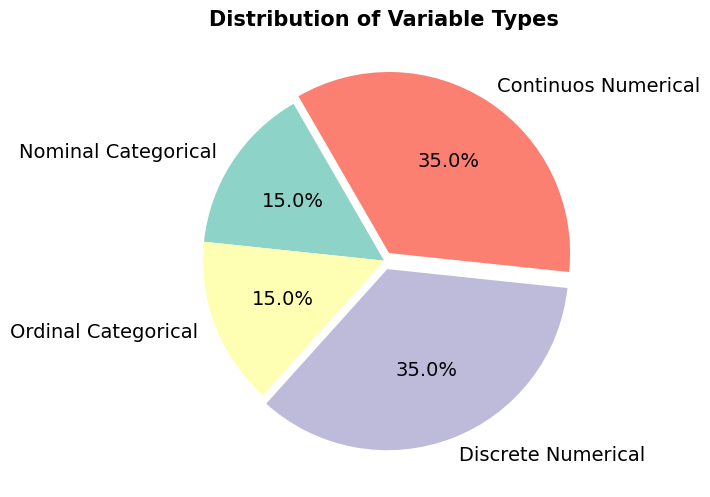

In [0]:
pie_type_var = GraphicsData(data = data_ax)
pie_type_var.plot_variable_type(count_col='count_types', label_col='ct_type_cols')

### Checking the data initially to verify its characteristics and structure

####Checking some statistical data from the numerical columns of the data

In [0]:
df_describe = df.select(*discrete_numerical, *continuos_numerical) \
    .describe()
df_describe.display()

summary customer_age dependent_count months_on_book total_relationship_count months_inactive_12_mon contacts_count_12_mon total_trans_ct credit_limit total_revolving_bal avg_open_to_buy total_amt_chng_q4_q1 total_trans_amt total_ct_chng_q4_q1 avg_utilization_ratio count 10127 10127 10127 10127 10127 10127 10127 10127 10127 10127 10127 10127 10127 10127 mean 46.32596030413745 2.3462032191172115 35.928409203120374 3.8125802310654686 2.3411671768539546 2.4553174681544387 64.85869457884863 8631.953698034848 1162.8140614199665 7469.139636614887 0.7599406536980376 4404.086303939963 0.7122223758269962 0.2748935518909845 stddev 8.016814032549028 1.2989083489037905 7.986416330872065 1.5544078653388245 1.0106223994182797 1.106225142635925 23.472570449232997 9088.776650223146 814.9873352357283 9090.685323679081 0.21920676923070312 3397.1292535570824 0.23808609133294142 0.27569146925238613 min 26 0 13 1 0 0 10 1438.3 0 3.0 0.0 510 0.0 0.0 max 73 5 56 6 6 6 139 34516.0 2517 34516.0 3.397 18484 3.714 0.999

#### Mean of numerical variables

In [0]:
df_describe.filter(F.col('summary') == 'mean').display()

summary customer_age dependent_count months_on_book total_relationship_count months_inactive_12_mon contacts_count_12_mon total_trans_ct credit_limit total_revolving_bal avg_open_to_buy total_amt_chng_q4_q1 total_trans_amt total_ct_chng_q4_q1 avg_utilization_ratio mean 46.32596030413745 2.3462032191172115 35.928409203120374 3.8125802310654686 2.3411671768539546 2.4553174681544387 64.85869457884863 8631.953698034848 1162.8140614199665 7469.139636614887 0.7599406536980376 4404.086303939963 0.7122223758269962 0.2748935518909845

#### Check categorial variables

In [0]:
# Iterating over dataset columns
for column in  df.select(*nominal_categorical, *ordinal_categorical).columns:

    # Grouping columns by frequency and percentage
    df.groupBy(column) \
        .agg(F.count(column).alias('frequency')) \
        .withColumn('percentage', F.round((F.col('frequency') / df.count()) * 100, 2)) \
        .orderBy('frequency', ascending = False) \
        .display()     

attrition_flag frequency percentage Existing Customer 8500 83.93 Attrited Customer 1627 16.07

gender frequency percentage F 5358 52.91 M 4769 47.09

marital_status frequency percentage Married 4687 46.28 Single 3943 38.94 Unknown 749 7.4 Divorced 748 7.39

education_level frequency percentage Graduate 3128 30.89 High School 2013 19.88 Unknown 1519 15.0 Uneducated 1487 14.68 College 1013 10.0 Post-Graduate 516 5.1 Doctorate 451 4.45

income_category frequency percentage Less than $40K 3561 35.16 $40K - $60K 1790 17.68 $80K - $120K 1535 15.16 $60K - $80K 1402 13.84 Unknown 1112 10.98 $120K + 727 7.18

card_category frequency percentage Blue 9436 93.18 Silver 555 5.48 Gold 116 1.15 Platinum 20 0.2

#### Checking Outliers

The min values ​​of numerical data

In [0]:
df_describe.filter(F.col('summary') == 'min').display()

summary customer_age dependent_count months_on_book total_relationship_count months_inactive_12_mon contacts_count_12_mon total_trans_ct credit_limit total_revolving_bal avg_open_to_buy total_amt_chng_q4_q1 total_trans_amt total_ct_chng_q4_q1 avg_utilization_ratio min 26 0 13 1 0 0 10 1438.3 0 3.0 0.0 510 0.0 0.0

The max values ​​of numerical data

In [0]:
df_describe.filter(F.col('summary') == 'max').display()

summary customer_age dependent_count months_on_book total_relationship_count months_inactive_12_mon contacts_count_12_mon total_trans_ct credit_limit total_revolving_bal avg_open_to_buy total_amt_chng_q4_q1 total_trans_amt total_ct_chng_q4_q1 avg_utilization_ratio max 73 5 56 6 6 6 139 34516.0 2517 34516.0 3.397 18484 3.714 0.999

Distribution of numerical variables

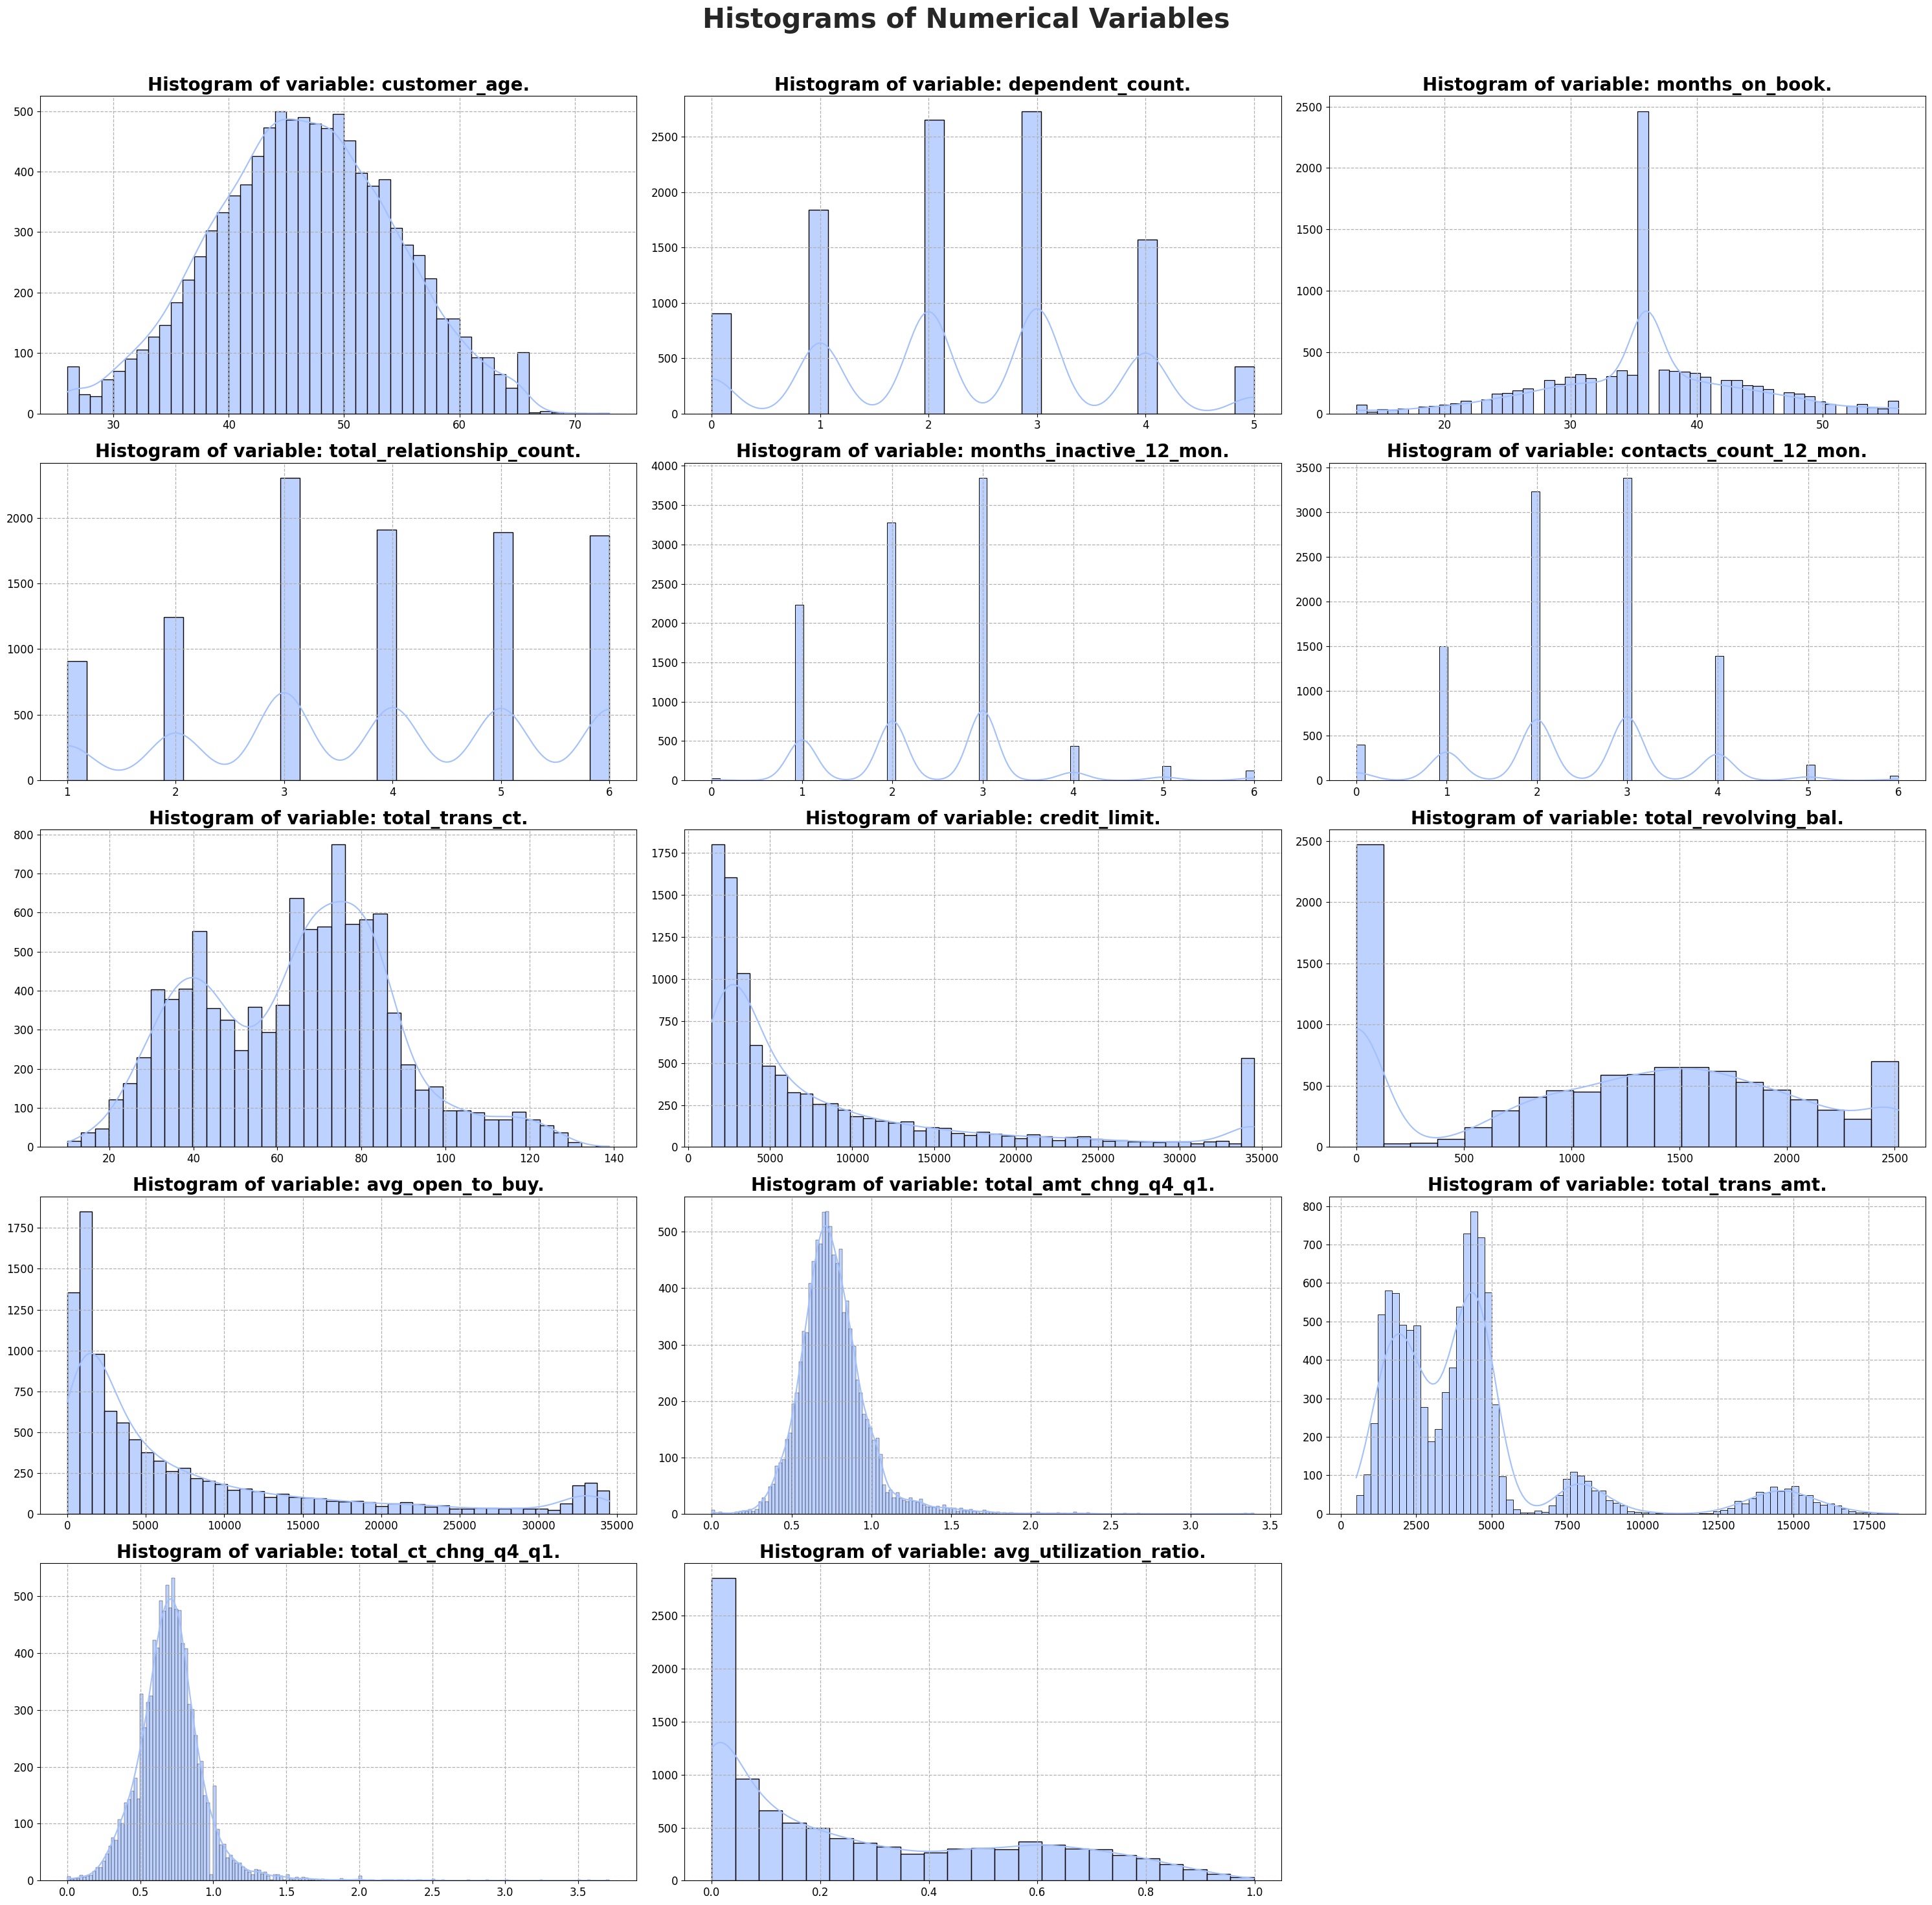

In [0]:
# Data Collect
data_ax = df.select(*discrete_numerical, *continuos_numerical).toPandas()
# Histoplots of Numerical Variables
GraphicsData(data_ax).numerical_histograms()

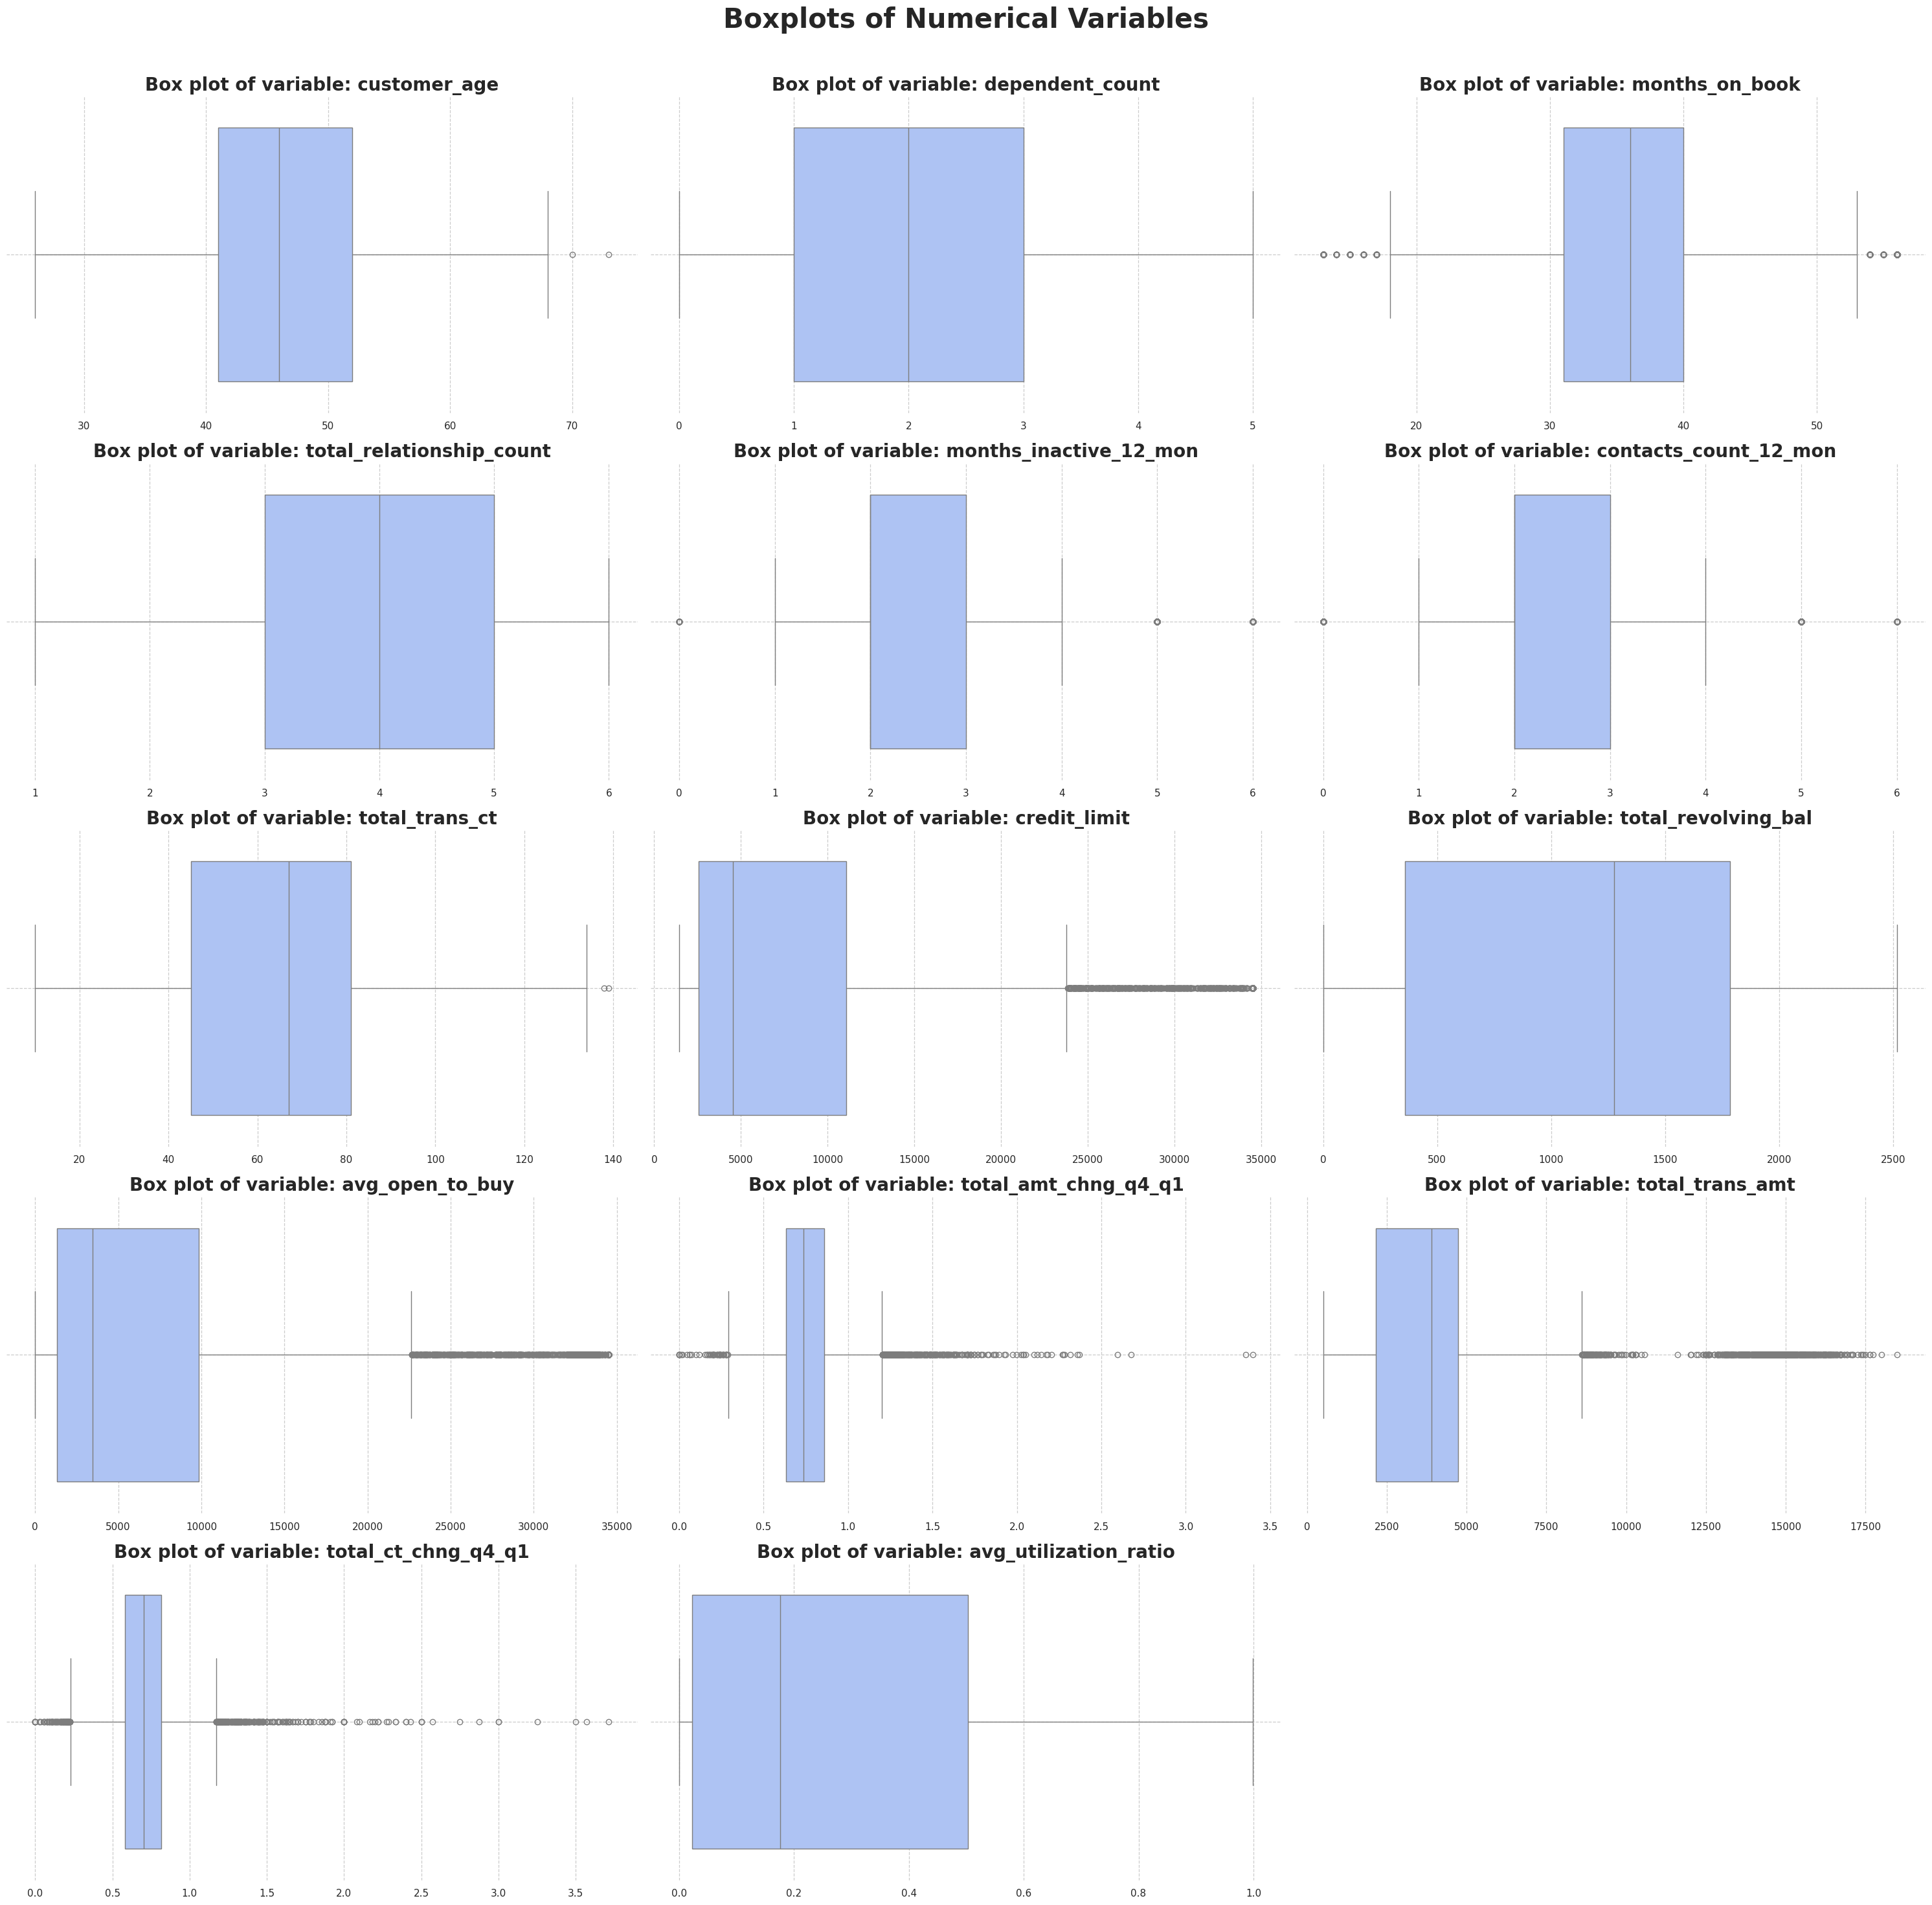

In [0]:
# Boxplots of Numerical Variables
GraphicsData(data_ax).numerical_boxplots(showfliers = True)

In [0]:
find_outliers(spark = spark, df_num = df.select(*discrete_numerical, *continuos_numerical))


✅ Percentage of Outliers by Column:


customer_age dependent_count months_on_book total_relationship_count months_inactive_12_mon contacts_count_12_mon total_trans_ct credit_limit total_revolving_bal avg_open_to_buy total_amt_chng_q4_q1 total_trans_amt total_ct_chng_q4_q1 avg_utilization_ratio 0.02 0.0 3.81 0.0 3.27 6.21 0.02 9.72 0.0 9.5 3.91 8.84 3.89 0.0


### Initial observations and insights:
---

- 1 - This dataset has a little over **10,000 records**, so it is a small dataset. This brings us some limitations regarding the statistical inferences that will be made in the analyses, and also regarding the training of models, it will be a little more difficult to train them and make them have a good generalization of the data.
---
- 2 - There is no **null data** or **duplicate data** in this dataset, which is a very positive thing.
---
- 3 - This dataset has as its main source of data **numerical variables**, corresponding to **70% of the data**, therefore, only **30% of the data** is **categorical**.
---
- 4 - The average age of customers is **46 years**, which indicates that we have a more mature profile and customer experience. Therefore, it is possible to hypothesize that, due to this factor, they tend to be more demanding regarding the services provided by the bank through credit cards.
---
- 5 - Customers have, on average, **2 dependents**, which can be a significant factor in understanding the profile of this banking institution's customers.
---
- 6 - On average, customers have been in a relationship with the bank for **35 months (about 3 years)**, which initially seems to be a positive thing, but it could be a factor that needs to be improved.
---
- 7 - Customers, on average, maintain approximately **4 products** offered by the bank. Therefore, this could be a factor that should be questioned and analyzed more carefully, so that it is possible to determine the influence of this factor on the turnover rate of this institution's customers.
---
- 8 - Most customers are **married, about 46%**, which can provide us with more information about the products and services to be offered to this customer profile.
---
- 9 - Most customers are **graduates**, around 30%.
---
- 10 - Most customers earn less than **$40,000** per year.
---
- 11 - On average, customers tend to use **27%** of their credit card limit.
---
- 12 - The **Blue** card is the most common category of credit cards, with around **93%** of participation.
---
- 13 - There is a balance between the number of male and female customers, with a slight majority of women.
---
- 14 - Initially, I considered the **IQR** as a parameter to define the existence of **outliers** in this dataset. Some numeric variables have data that, statistically, can be considered outliers. The **Credit_Limit** variable, for example, has 9.72% of data that can be considered outliers. However, all data and numeric columns will be analyzed to verify whether they are part of the **natural distribution** of this dataset or whether they are **incorrect data**.

---


## 3 - Data Preparation
---

- In this step, I will initially divide the training and testing data so that the testing data does not interfere in the analyses, so that the model does not have any bias from the testing data, and only with the training data is it capable of generating good classifications with good generalization.
---
- Next, an EDA will be conducted to verify the data and its main characteristics. In this EDA, the main objective will be to understand the relationship of the data with the churn rate of this banking institution.
---

### Adjusting dataset targets
---

I will adjust the target column, which is attrition_flag. Since it is a categorical column with binary classification:

---

- **Existing Customer (Non-churner)**: will receive the **value 0**. 

  These are customers who still use the credit card services provided by the bank.

---

- **Attrited Customer (Churner)**: will receive the **value 1**. 

  These are customers who have stopped using the credit card services.

---

This approach will make it easier to calculate correlation statistics between variables since the target variable is already indexed.

---

In [0]:
# Indexing and adjusting the target column name
df_clean = df.withColumn('churn_target', F.when(F.col('attrition_flag') == 'Existing Customer', 0).otherwise(1).cast(IntegerType()))

# Saving previously cleaned and adjusted data to a new dataframe
df_clean = df_clean.drop('attrition_flag')

# Adjusting the list of nominal variables
nominal_categorical.remove('attrition_flag')

# Check new df
df_clean.limit(5).display()

customer_age gender dependent_count education_level marital_status income_category card_category months_on_book total_relationship_count months_inactive_12_mon contacts_count_12_mon credit_limit total_revolving_bal avg_open_to_buy total_amt_chng_q4_q1 total_trans_amt total_trans_ct total_ct_chng_q4_q1 avg_utilization_ratio churn_target 45 M 3 High School Married $60K - $80K Blue 39 5 1 3 12691.0 777 11914.0 1.335 1144 42 1.625 0.061 0 49 F 5 Graduate Single Less than $40K Blue 44 6 1 2 8256.0 864 7392.0 1.541 1291 33 3.714 0.105 0 51 M 3 Graduate Married $80K - $120K Blue 36 4 1 0 3418.0 0 3418.0 2.594 1887 20 2.333 0.0 0 40 F 4 High School Unknown Less than $40K Blue 34 3 4 1 3313.0 2517 796.0 1.405 1171 20 2.333 0.76 0 40 M 3 Uneducated Married $60K - $80K Blue 21 5 1 0 4716.0 0 4716.0 2.175 816 28 2.5 0.0 0


### Silver Data Tier

In [0]:
# File location and type
file_location = '/Volumes/workspace/projects-data-science/churn-project-data/silver'
file_type = 'parquet'

# Save  Clean Dataset
DataSpark(spark = spark, dataframe = df_clean, file_location = file_location).save_data(file_type = file_type)

# Reading Dataset
df = DataSpark(spark = spark, file_location = file_location).load_data(file_type = file_type)

# Check Dataset
df.limit(10).display()

✅ Data saved in: /Volumes/workspace/projects-data-science/churn-project-data/silver.
✅ File loaded from: /Volumes/workspace/projects-data-science/churn-project-data/silver.


customer_age gender dependent_count education_level marital_status income_category card_category months_on_book total_relationship_count months_inactive_12_mon contacts_count_12_mon credit_limit total_revolving_bal avg_open_to_buy total_amt_chng_q4_q1 total_trans_amt total_trans_ct total_ct_chng_q4_q1 avg_utilization_ratio churn_target 45 M 3 High School Married $60K - $80K Blue 39 5 1 3 12691.0 777 11914.0 1.335 1144 42 1.625 0.061 0 49 F 5 Graduate Single Less than $40K Blue 44 6 1 2 8256.0 864 7392.0 1.541 1291 33 3.714 0.105 0 51 M 3 Graduate Married $80K - $120K Blue 36 4 1 0 3418.0 0 3418.0 2.594 1887 20 2.333 0.0 0 40 F 4 High School Unknown Less than $40K Blue 34 3 4 1 3313.0 2517 796.0 1.405 1171 20 2.333 0.76 0 40 M 3 Uneducated Married $60K - $80K Blue 21 5 1 0 4716.0 0 4716.0 2.175 816 28 2.5 0.0 0 44 M 2 Graduate Married $40K - $60K Blue 36 3 1 2 4010.0 1247 2763.0 1.376 1088 24 0.846 0.311 0 51 M 4 Unknown Married $120K + Gold 46 6 1 3 34516.0 2264 32252.0 1.975 1330 31 0.722 0.066 0 32 M 0 High School Unknown $60K - $80K Silver 27 2 2 2 29081.0 1396 27685.0 2.204 1538 36 0.714 0.048 0 37 M 3 Uneducated Single $60K - $80K Blue 36 5 2 0 22352.0 2517 19835.0 3.355 1350 24 1.182 0.113 0 48 M 2 Graduate Single $80K - $120K Blue 36 6 3 3 11656.0 1677 9979.0 1.524 1441 32 0.882 0.144 0

### Splitting the Training and Testing data
---
* From here on, all analyses will be based on the **training dataset**, which will represent **80%** of the total dataset. I chose to separate the data from this point on to avoid **leaking test data**, since this data cannot be influenced by the analysis or modeling applied to the training data.

---

* I will be using pyspark randomSplit function, I will be looking for an equal division in the distribution of targets in this data set.

---

In [0]:
# Df data
df.groupBy('churn_target') \
    .agg(F.count('churn_target').alias('frequency')) \
    .withColumn('percentage', F.round((F.col('frequency') / df.count()) * 100, 2)) \
    .orderBy('frequency', ascending = False) \
    .display()  

churn_target frequency percentage 0 8500 83.93 1 1627 16.07

In [0]:
train, test = df.randomSplit([0.8, 0.2], seed = 10) 

In [0]:
# Training data
train.groupBy('churn_target') \
    .agg(F.count('churn_target').alias('frequency')) \
    .withColumn('percentage', F.round((F.col('frequency') / train.count()) * 100, 2)) \
    .orderBy('frequency', ascending = False) \
    .display()  

churn_target frequency percentage 0 6776 83.92 1 1298 16.08

In [0]:
# Test data
test.groupBy('churn_target') \
    .agg(F.count('churn_target').alias('frequency')) \
    .withColumn('percentage', F.round((F.col('frequency') / test.count()) * 100, 2)) \
    .orderBy('frequency', ascending = False) \
    .display()  

churn_target frequency percentage 0 1724 83.97 1 329 16.03


### Exploratory Data Analysis - EDA

The **Exploratory Data Analysis (EDA)** for this project will be carried out in three main stages: **Univariate Analysis**, **Bivariate Analysis**, and **Multivariate Analysis**.  
The goal is to explore and understand the patterns within the dataset, identifying relationships, trends, and potential insights that can guide the development of effective solutions.

---

#### Univariate Analysis  
- **What it is:** Examines **one variable at a time**, without considering its relationship to others.  
- **Purpose:** Understand the distribution, central tendency, and dispersion of the variable, as well as detect possible outliers.  

---

#### Bivariate Analysis  
- **What it is:** Studies **the relationship between two variables**.  
- **Purpose:** Identify correlations, patterns, or dependencies, and assess how one variable may influence the other.  

---

#### Multivariate Analysis  
- **What it is:** Investigates **three or more variables simultaneously**.  
- **Purpose:** Understand complex interactions and multidimensional patterns, identifying combinations of factors that influence the observed behavior.  

---

### Univariate Analysis 

#### Checking the churn rate

In [0]:
# Data collect
train_churn = train.groupBy('churn_target') \
    .agg(F.count('churn_target').alias('frequency')) \
    .withColumn('percentage', F.round((F.col('frequency') / train.count()) * 100, 2)) \
    .withColumn('churn_target',F.when(F.col('churn_target') == 1, 'Churners').otherwise('Non-Churners')) \
    .orderBy('frequency', ascending = False)

# Data of graphics
data_ax = train_churn.toPandas()

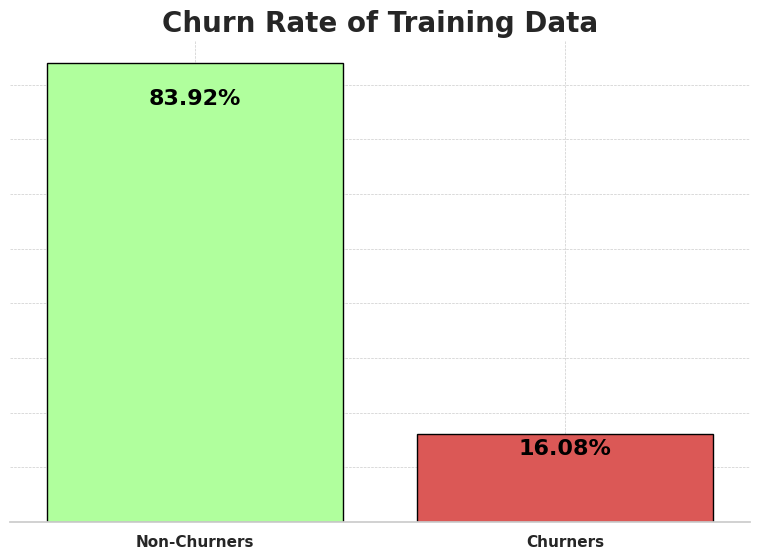

In [0]:
GraphicsData(data_ax).barplot_target(
    target_col = 'churn_target', 
    percentage_col = 'percentage', 
    title = 'Churn Rate of Training Data'
)

- In this dataset, the rate of customers who abandon credit card services is **16.01%**, while **83.99%** of customers continue to use the bank's services.
---
- Taking into account a basic principle of simple statistics, it is possible to observe that, for every **100 customers**, at least **16** of them discontinued credit card services.
---
- This dataset has imbalanced classes, which can be a factor to be considered when training machine learning models. Datasets with imbalanced classes make it more difficult to train and generalize model classifications, especially for **minority** classes. In general, models tend to learn more easily to predict the **majority class**, while they have more difficulty in detecting **minority classes**.

---

#### Checking the distributions of numerical variables

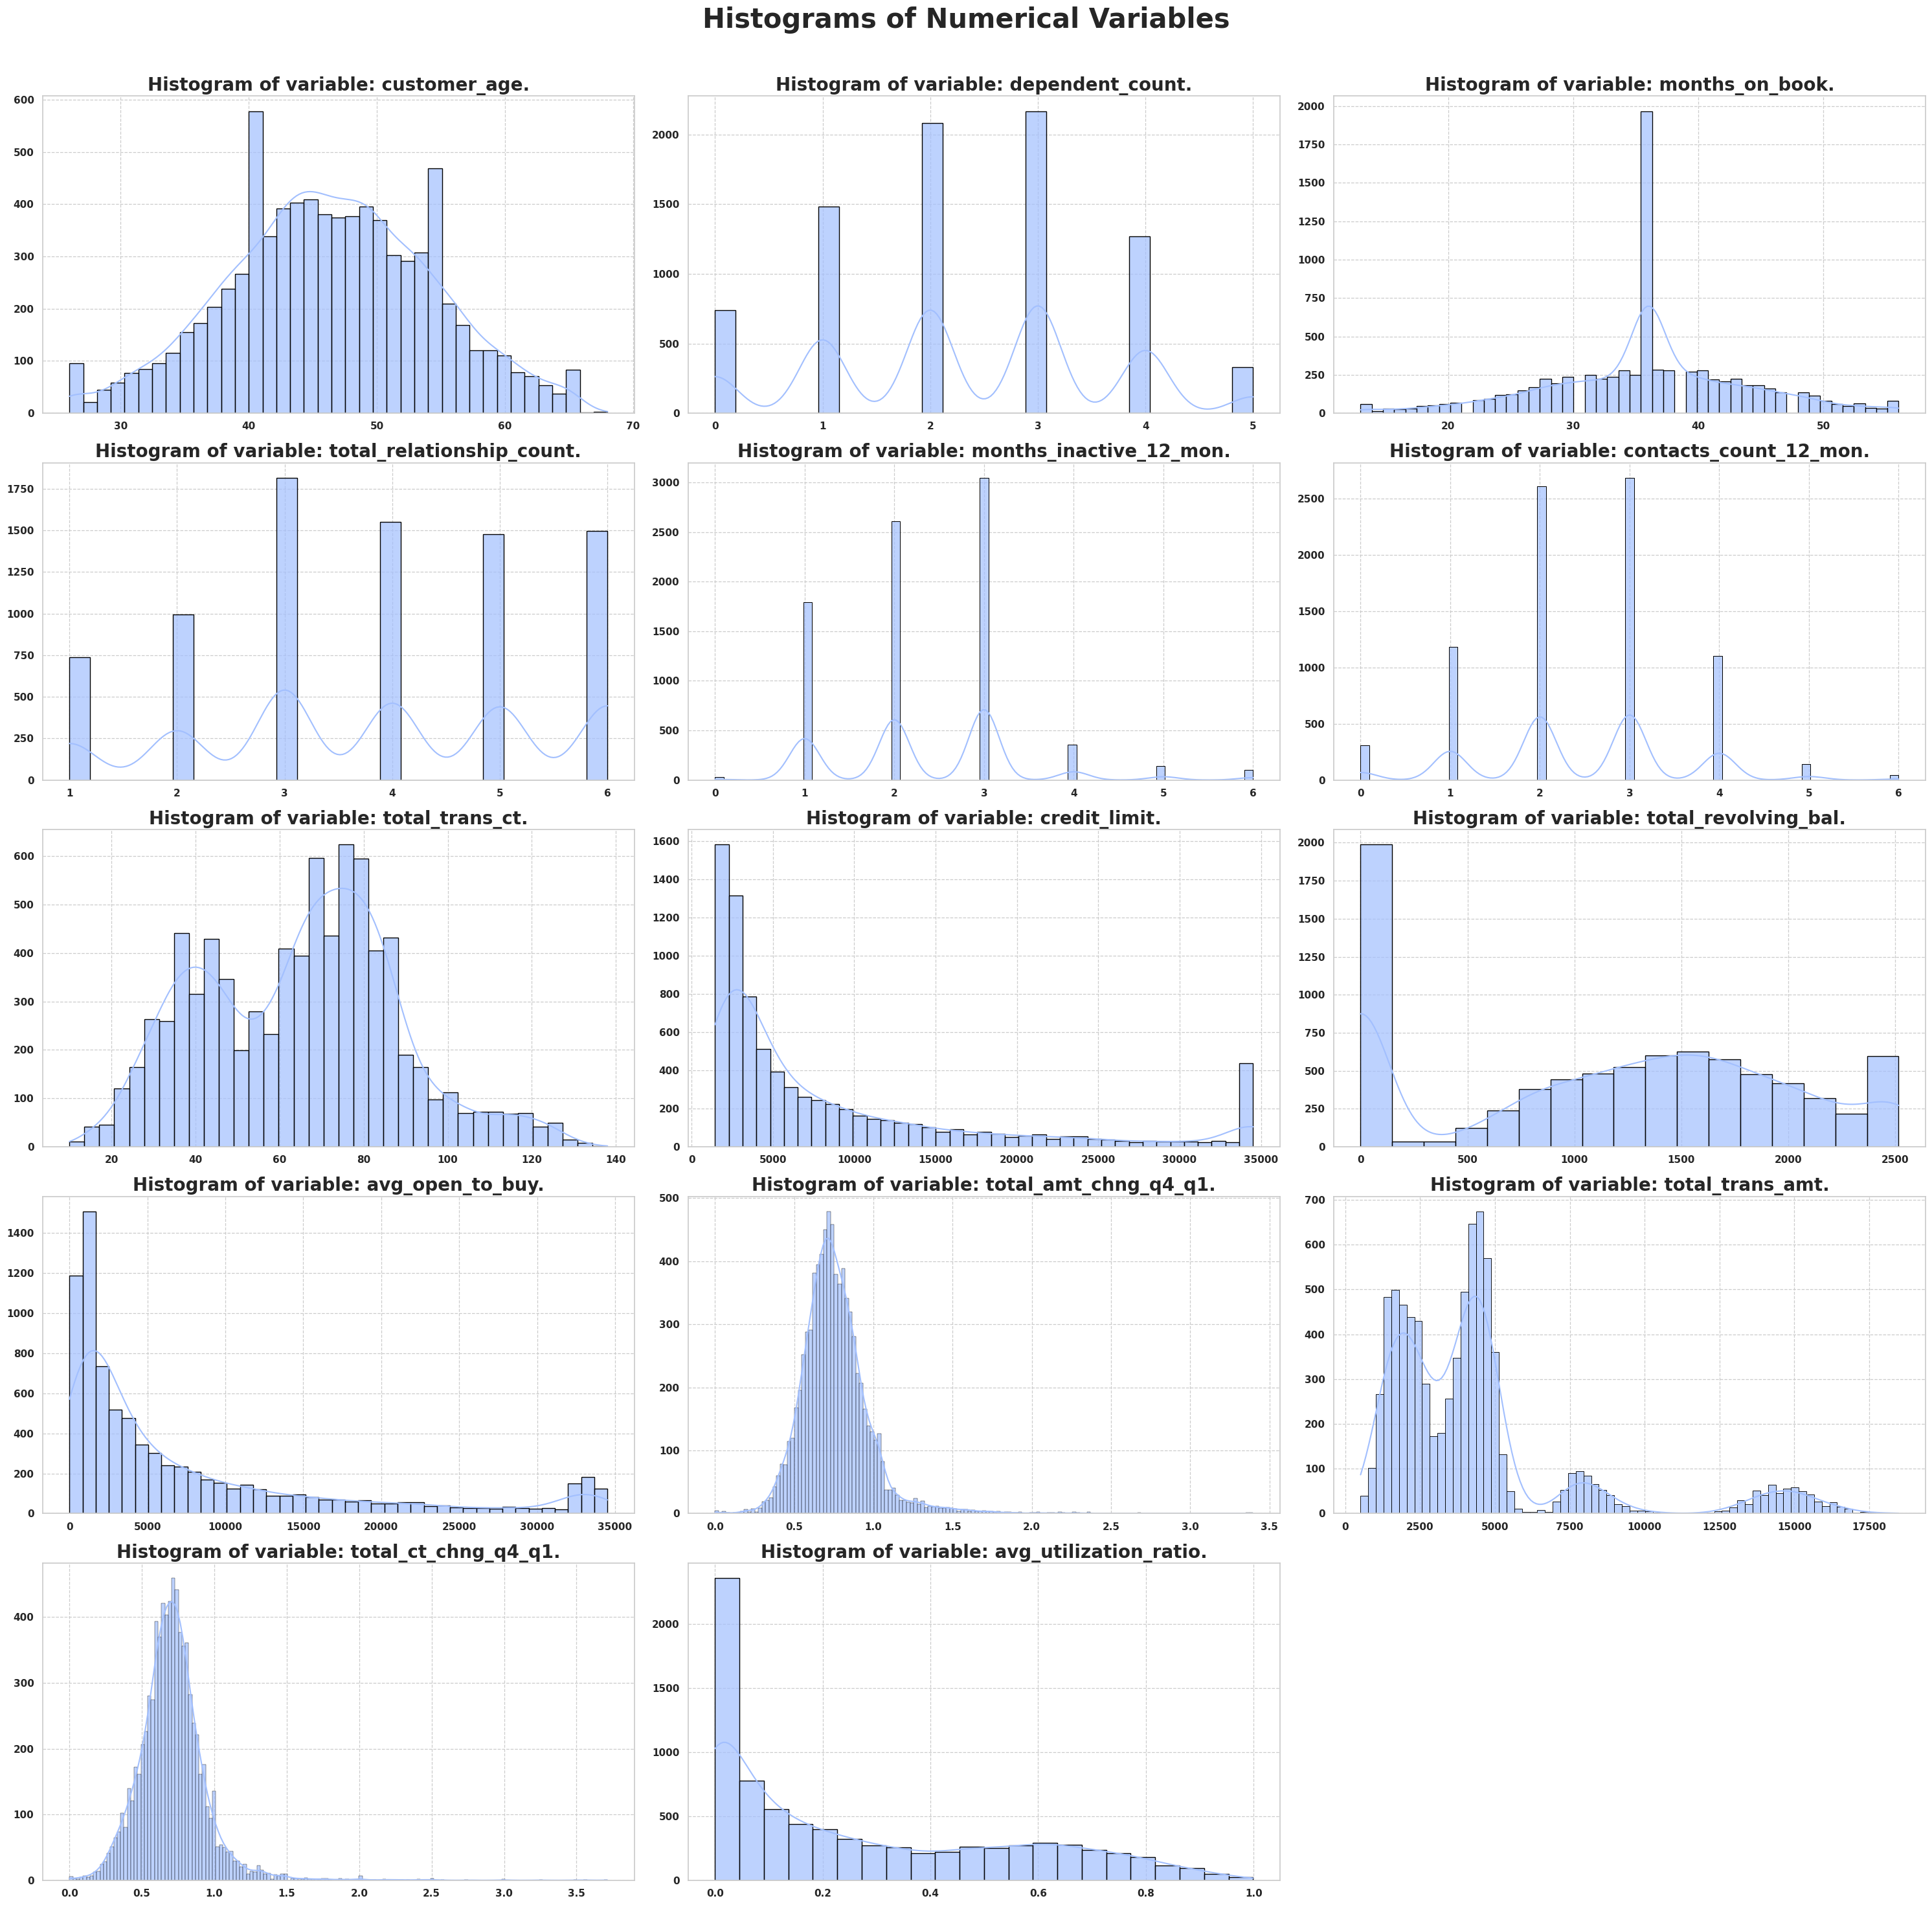

In [0]:
data_ax = train.select(*discrete_numerical, *continuos_numerical).toPandas()
GraphicsData(data_ax).numerical_histograms()

#### Observations and insights regarding numerical data
---
- 1 - The **age of customers** is more widely distributed between the **40** and **50 age groups**, with **49** being the most frequent age group in these data.
---
- 2 - Most customers have between **2** and **3 dependents**, with a minority having 5 dependents.
---
- 3 - The length of the **customer's relationship** with the bank varies from **13** to **56 months**, with **36 months** being the most frequent.
---
- 4 - The **number of products** maintained by the customer is generally above **3 products**, with few customers maintaining only **1** or **2 products**.
---
- 5 - Most **customers remain inactive** for a maximum of **3 months**, with only a small fraction remaining inactive for **4** to **6 months**.
---
- 6 - The **number of contacts** in the last 12 months was, in most cases, **2** to **3 contacts**.
---
- 7 - The **number of transactions** is mostly distributed between **60** and **80 transactions**, with a very small portion of customers making less than **20** or more than **100 transactions**.
---
- 8 - Most customers have a **credit limit** of less than **5,000 dollars**, although there is a relatively significant portion of customers with a limit of **35,000 dollars**.
---
- 9 -Most customers have a **zero credit card revolving balance**, which is relatively positive, indicating that most customers are up to date with their bill payments.
---
- 10 - The **average open to buy**  is below **5,000 dollars**.
---
- 11 - Most credit **card limit utilization** is below **20%**, with a small portion of customers using more than **80%** of their credit card limit.

#### Checking the distribution of categorical variables

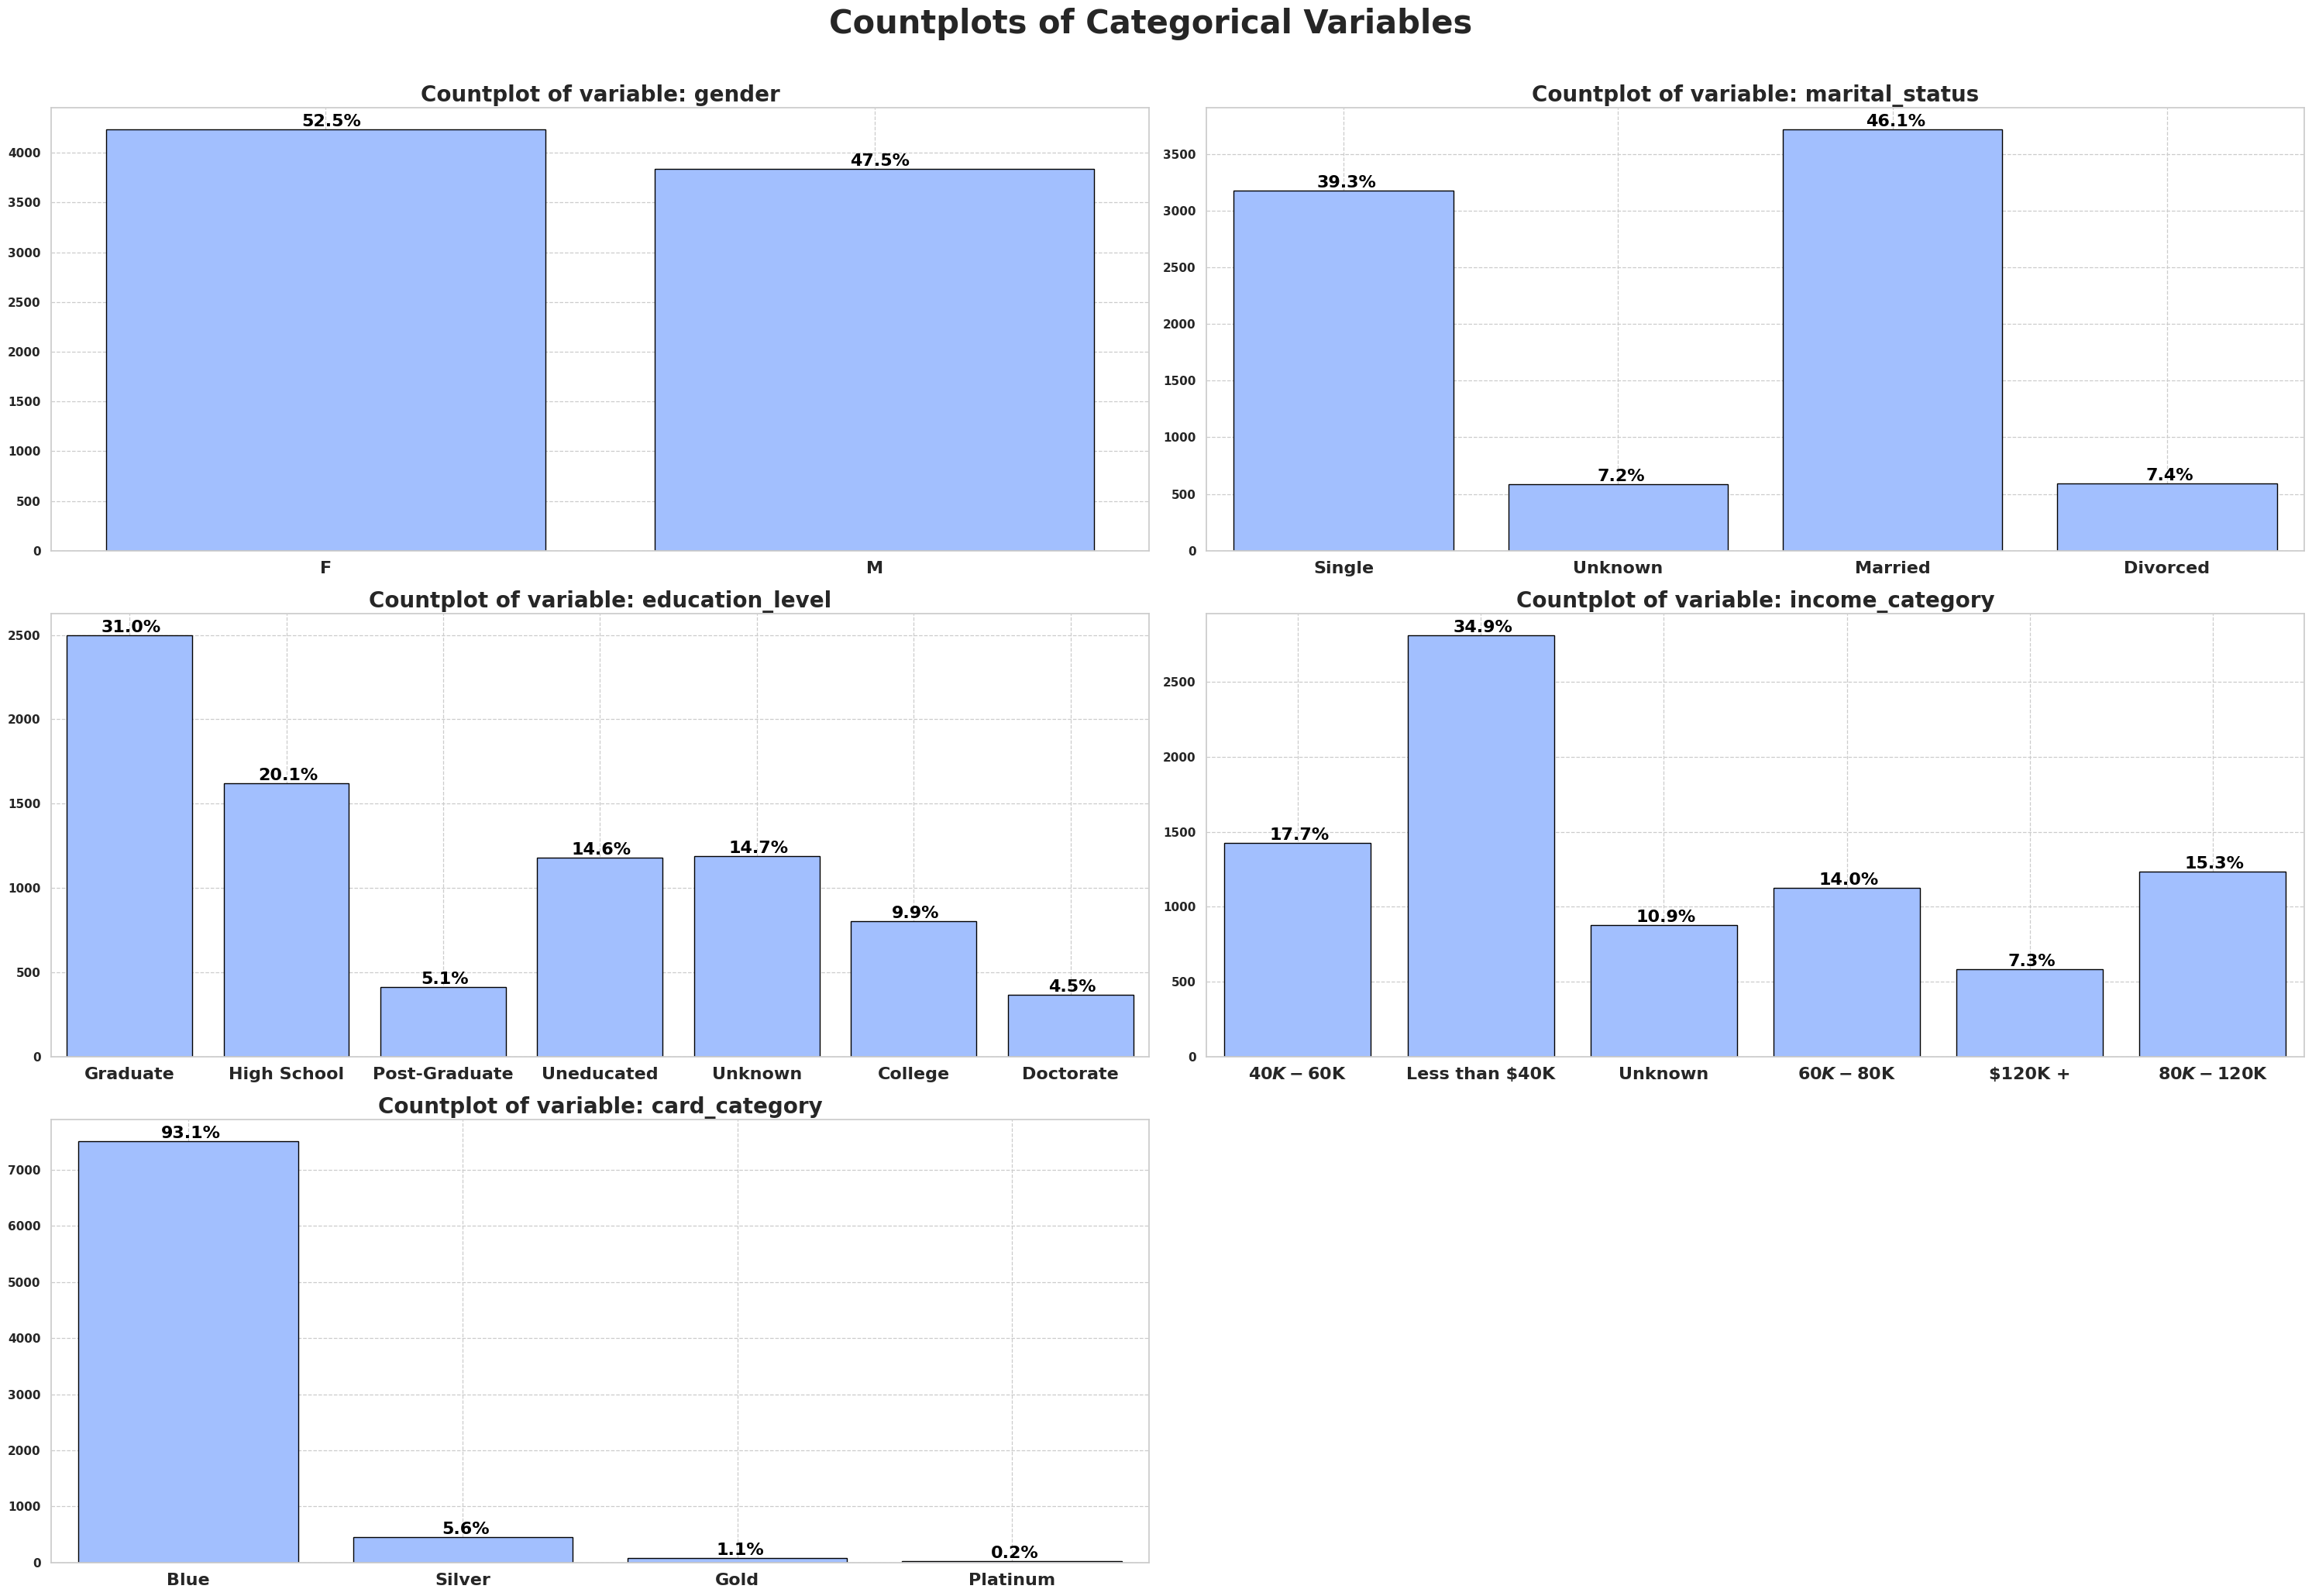

In [0]:
# Data collect
data_ax = train.select(*nominal_categorical, *ordinal_categorical).toPandas()
# Categorical Countplots
GraphicsData(data_ax).categorical_countplots()


#### Observations and insights regarding categorical data
---

- 1 - The majority of clients are women, with a percentage of **52.5%**.
---
- 2 - **46.1%** of clients are **married**, while **39.3%** are **single**. There is a small portion of **7.4%** of **divorced** clients and another portion of **7.2%** of clients who do **not fit** into any of the above categories.
---
- 3 - The majority of clients have a **Graduate** level of education, with **31%**. This status refers to people who have already graduated and completed a specialization in the area they studied.

  **High School** represents **20.1%**. This status refers to people who have already graduated and completed high school.

  **Unknown** represents **14.7%**. This status refers to people who possibly did not fill out the form or did not fit into any of the above classifications.

  **Uneducated** represents **14.6%**. This status refers to people who have not had access to formal education or have not completed a significant level of study.

  **College** represents **9.9%**. This status refers to higher education.

  Finally, the **Postgraduate** and **Doctorate** statuses have the smallest shares. **Postgraduate** is basically a synonym for **Graduate**, both referring to the same status, while **Doctorate** refers to the highest level of study.
---
- 4 - The majority of clients, **34.9%**, have an income below **40k**.

  **17.7%** of clients have an income between **40k and 60k**.

  **14%** have an income between **60k and 80k**.

  **15.3%** have an income between **80k and 120k**.

  **10.9%** did not fill out this information or do not fit into any of the categories above.

  A smaller portion, **7.3%**, has an income above **120k** per year.
---
- 5 - **93.1%** of customers have a **Blue** credit card, which is the dominant class. Next comes the **Silver** credit card with **5.6%**, and the **Gold** and **Platinum** cards with a small share of participation that is practically nil.

### Bivariate Analysis

#### Checking the correlation of numerical variables with the cause of the problem

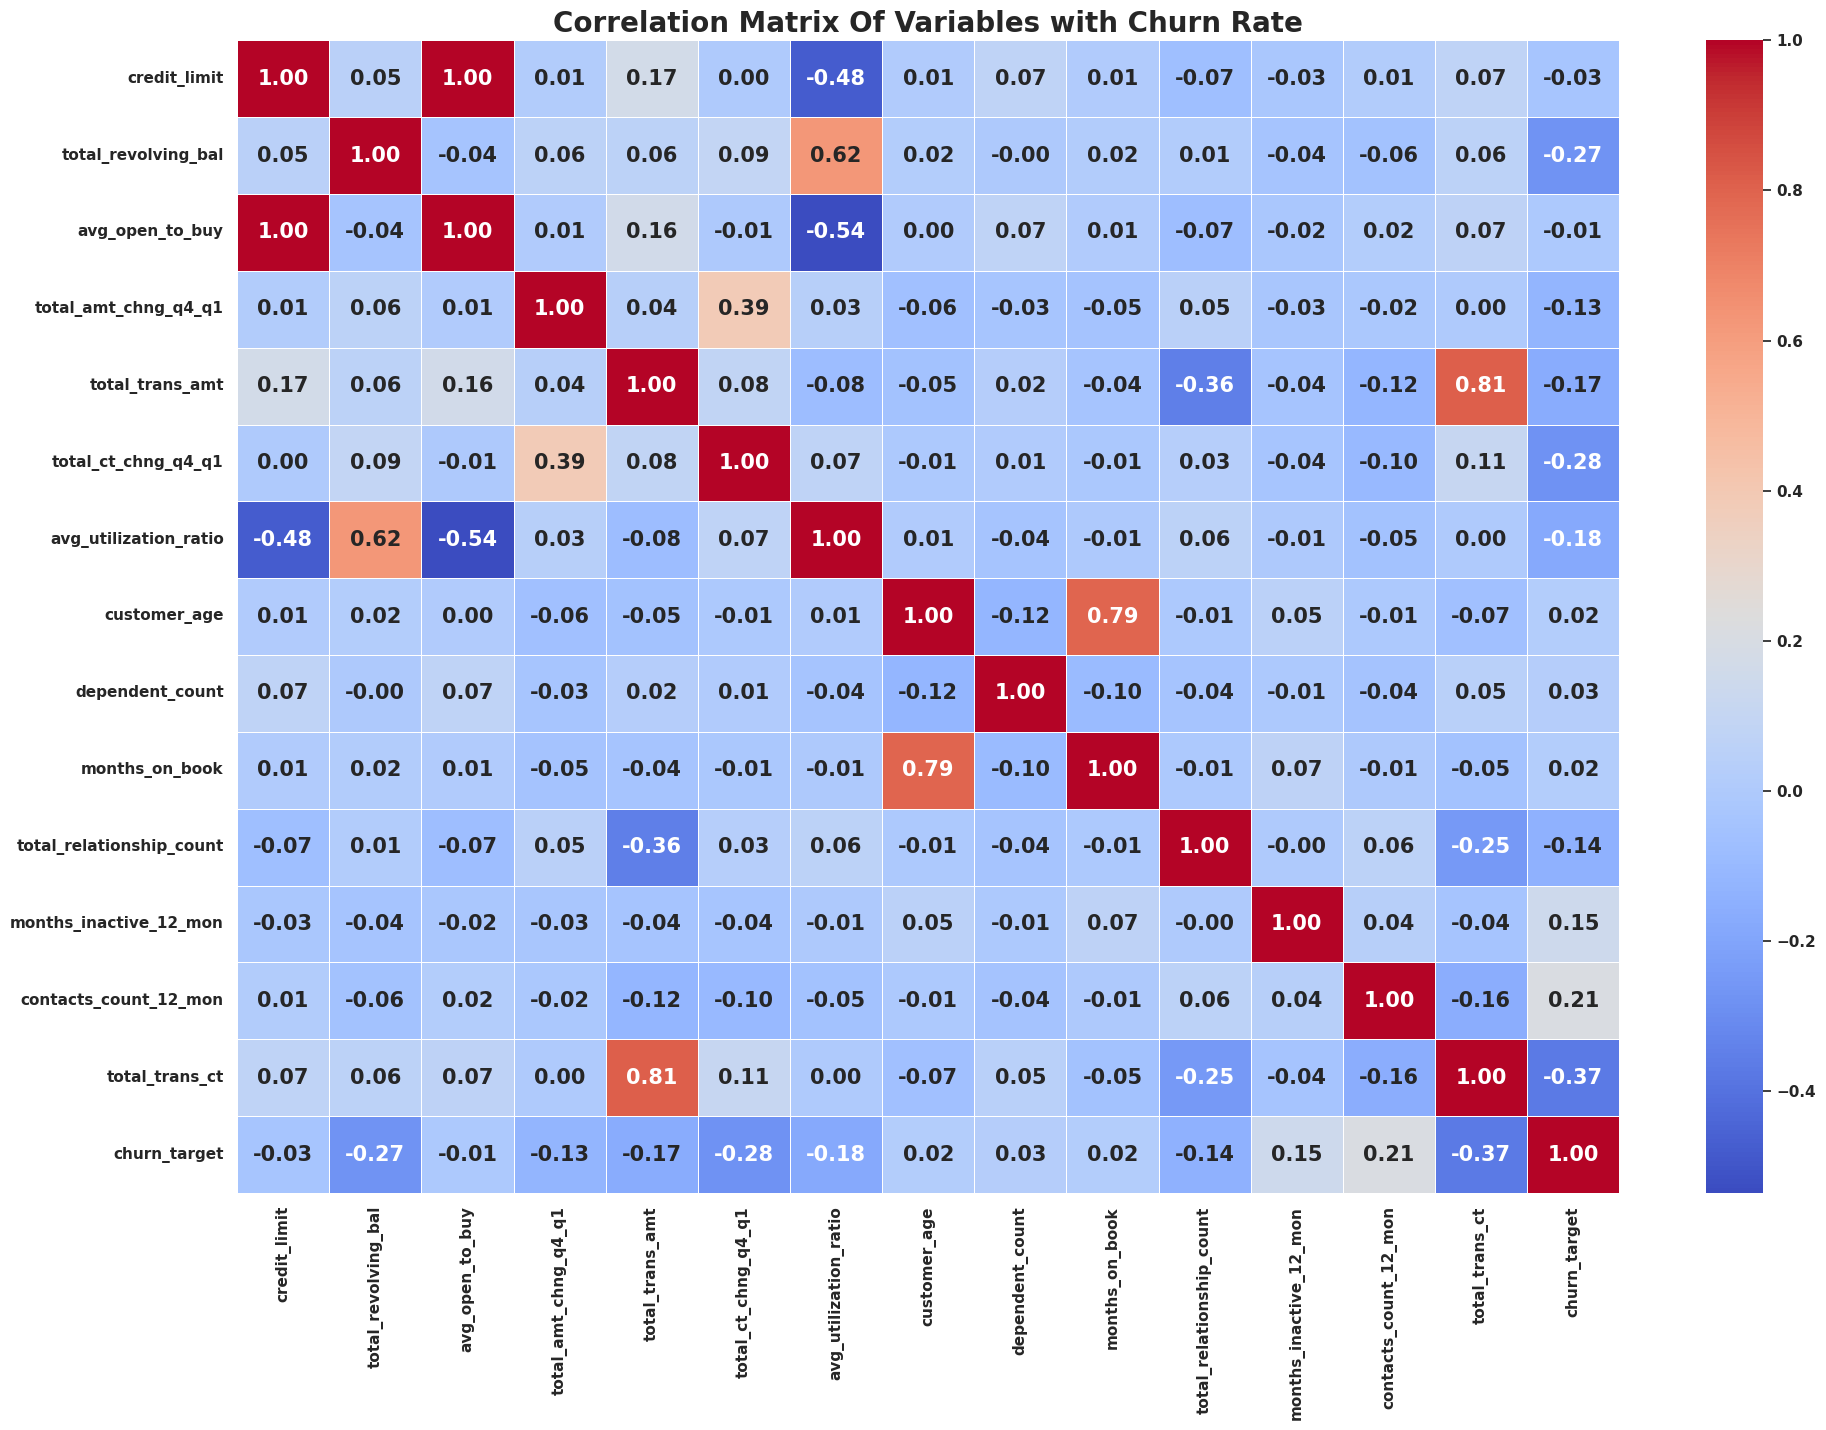

In [0]:
# Data collect
data_ax = train.select(*continuos_numerical, *discrete_numerical, 'churn_target').toPandas()
# Correlation Heatmap
GraphicsData(data_ax).correlation_heatmap(title = 'Correlation Matrix Of Variables with Churn Rate')

Variables ordered by correlation with the churn target variable:

In [0]:
data_ax.corr()['churn_target'].abs().sort_values(ascending = False)

churn_target                1.000000
total_trans_ct              0.369167
total_ct_chng_q4_q1         0.281698
total_revolving_bal         0.272243
contacts_count_12_mon       0.208269
avg_utilization_ratio       0.181418
total_trans_amt             0.167652
months_inactive_12_mon      0.147126
total_relationship_count    0.142264
total_amt_chng_q4_q1        0.125800
credit_limit                0.032129
dependent_count             0.027268
months_on_book              0.019012
customer_age                0.018751
avg_open_to_buy             0.007892
Name: churn_target, dtype: float64

#### Observations and insights on the correlation of numeric variables with the 'churn_target' variable.
---
**Considering that a customer who churns has a value of 1 and a customer who does not churn has a value of 0:**

---
- 1 - **total_trans_ct** is the variable with the highest correlation with the **churn_target** variable, with a negative correlation of **-0.37**. This indicates that the lower the number of transactions in the last 12 months, the greater the likelihood that customers will stop using credit card services.
---
- 2 - **total_ct_chng_q4_q1** had a correlation of **-0.28**. This column represents the change in the number of transactions between the fourth quarter (Q4) of the previous year and the first quarter (Q1). The lower this index, the greater the possibility of the customer stopping using the credit card.
---
- 3 - Customers with a lower **revolving balance** are more likely to become **inactive**, while customers with a higher revolving balance tend to continue using the bank's credit card services. It is interesting to note that, even with a **higher revolving balance**, which can lead to possible future debt, these customers tend to remain **active customers** of the institution.
---
- 4 - The **number of contacts** made in the last 12 months showed a **positive correlation**, indicating that a higher number of contacts is statistically associated with the rate of **inactive customers**.
---
- 5 - The **use of the credit card limit** has a **negative correlation** with customers who have abandoned the credit card service, that is, the **lower the use of the card**, the greater the possibility of them becoming **inactive**. On the other hand, the greater the use of the credit card limit, the greater the possibility of the customer continuing to use the service.
---
- 6 - The **number of services** has a negative correlation with customers who have stopped using the credit card; the **fewer the number of services**, the greater the possibility of the customer becoming **inactive**.
---
- 7 - The **number of inactive months** has a **positive correlation** with inactive customers, since the higher this number, the greater the possibility of the customer becoming inactive.
---
- 8 - **total_amt_chng_q4_q1** has a **negative correlation** with inactive customers; the lower the total value of the variations between the fourth quarter (Q4) of the previous year and the first quarter (Q1), the greater the possibility of the customer becoming inactive.
---
- 9 - The variables ​​​​**avg_open_to_buy** and **credit_limit** have a **perfect correlation**, indicating that these two variables are passing the same information to future machine learning models.
---
- 10 - The **other variables** do not have a very relevant correlation with the **churn_target** variable.
---
- 11 - Initially, it is possible to conclude that the **number of transactions** carried out by customers in recent months has a **very strong and important correlation** with the problem in question, which is the abandonment of credit card customers. The **two variables** that most clearly relate to the **churn_target** variable are variables that provide information about the **number of transactions carried out by customers**. Therefore, it is now possible to question and create a hypothesis about this fact.

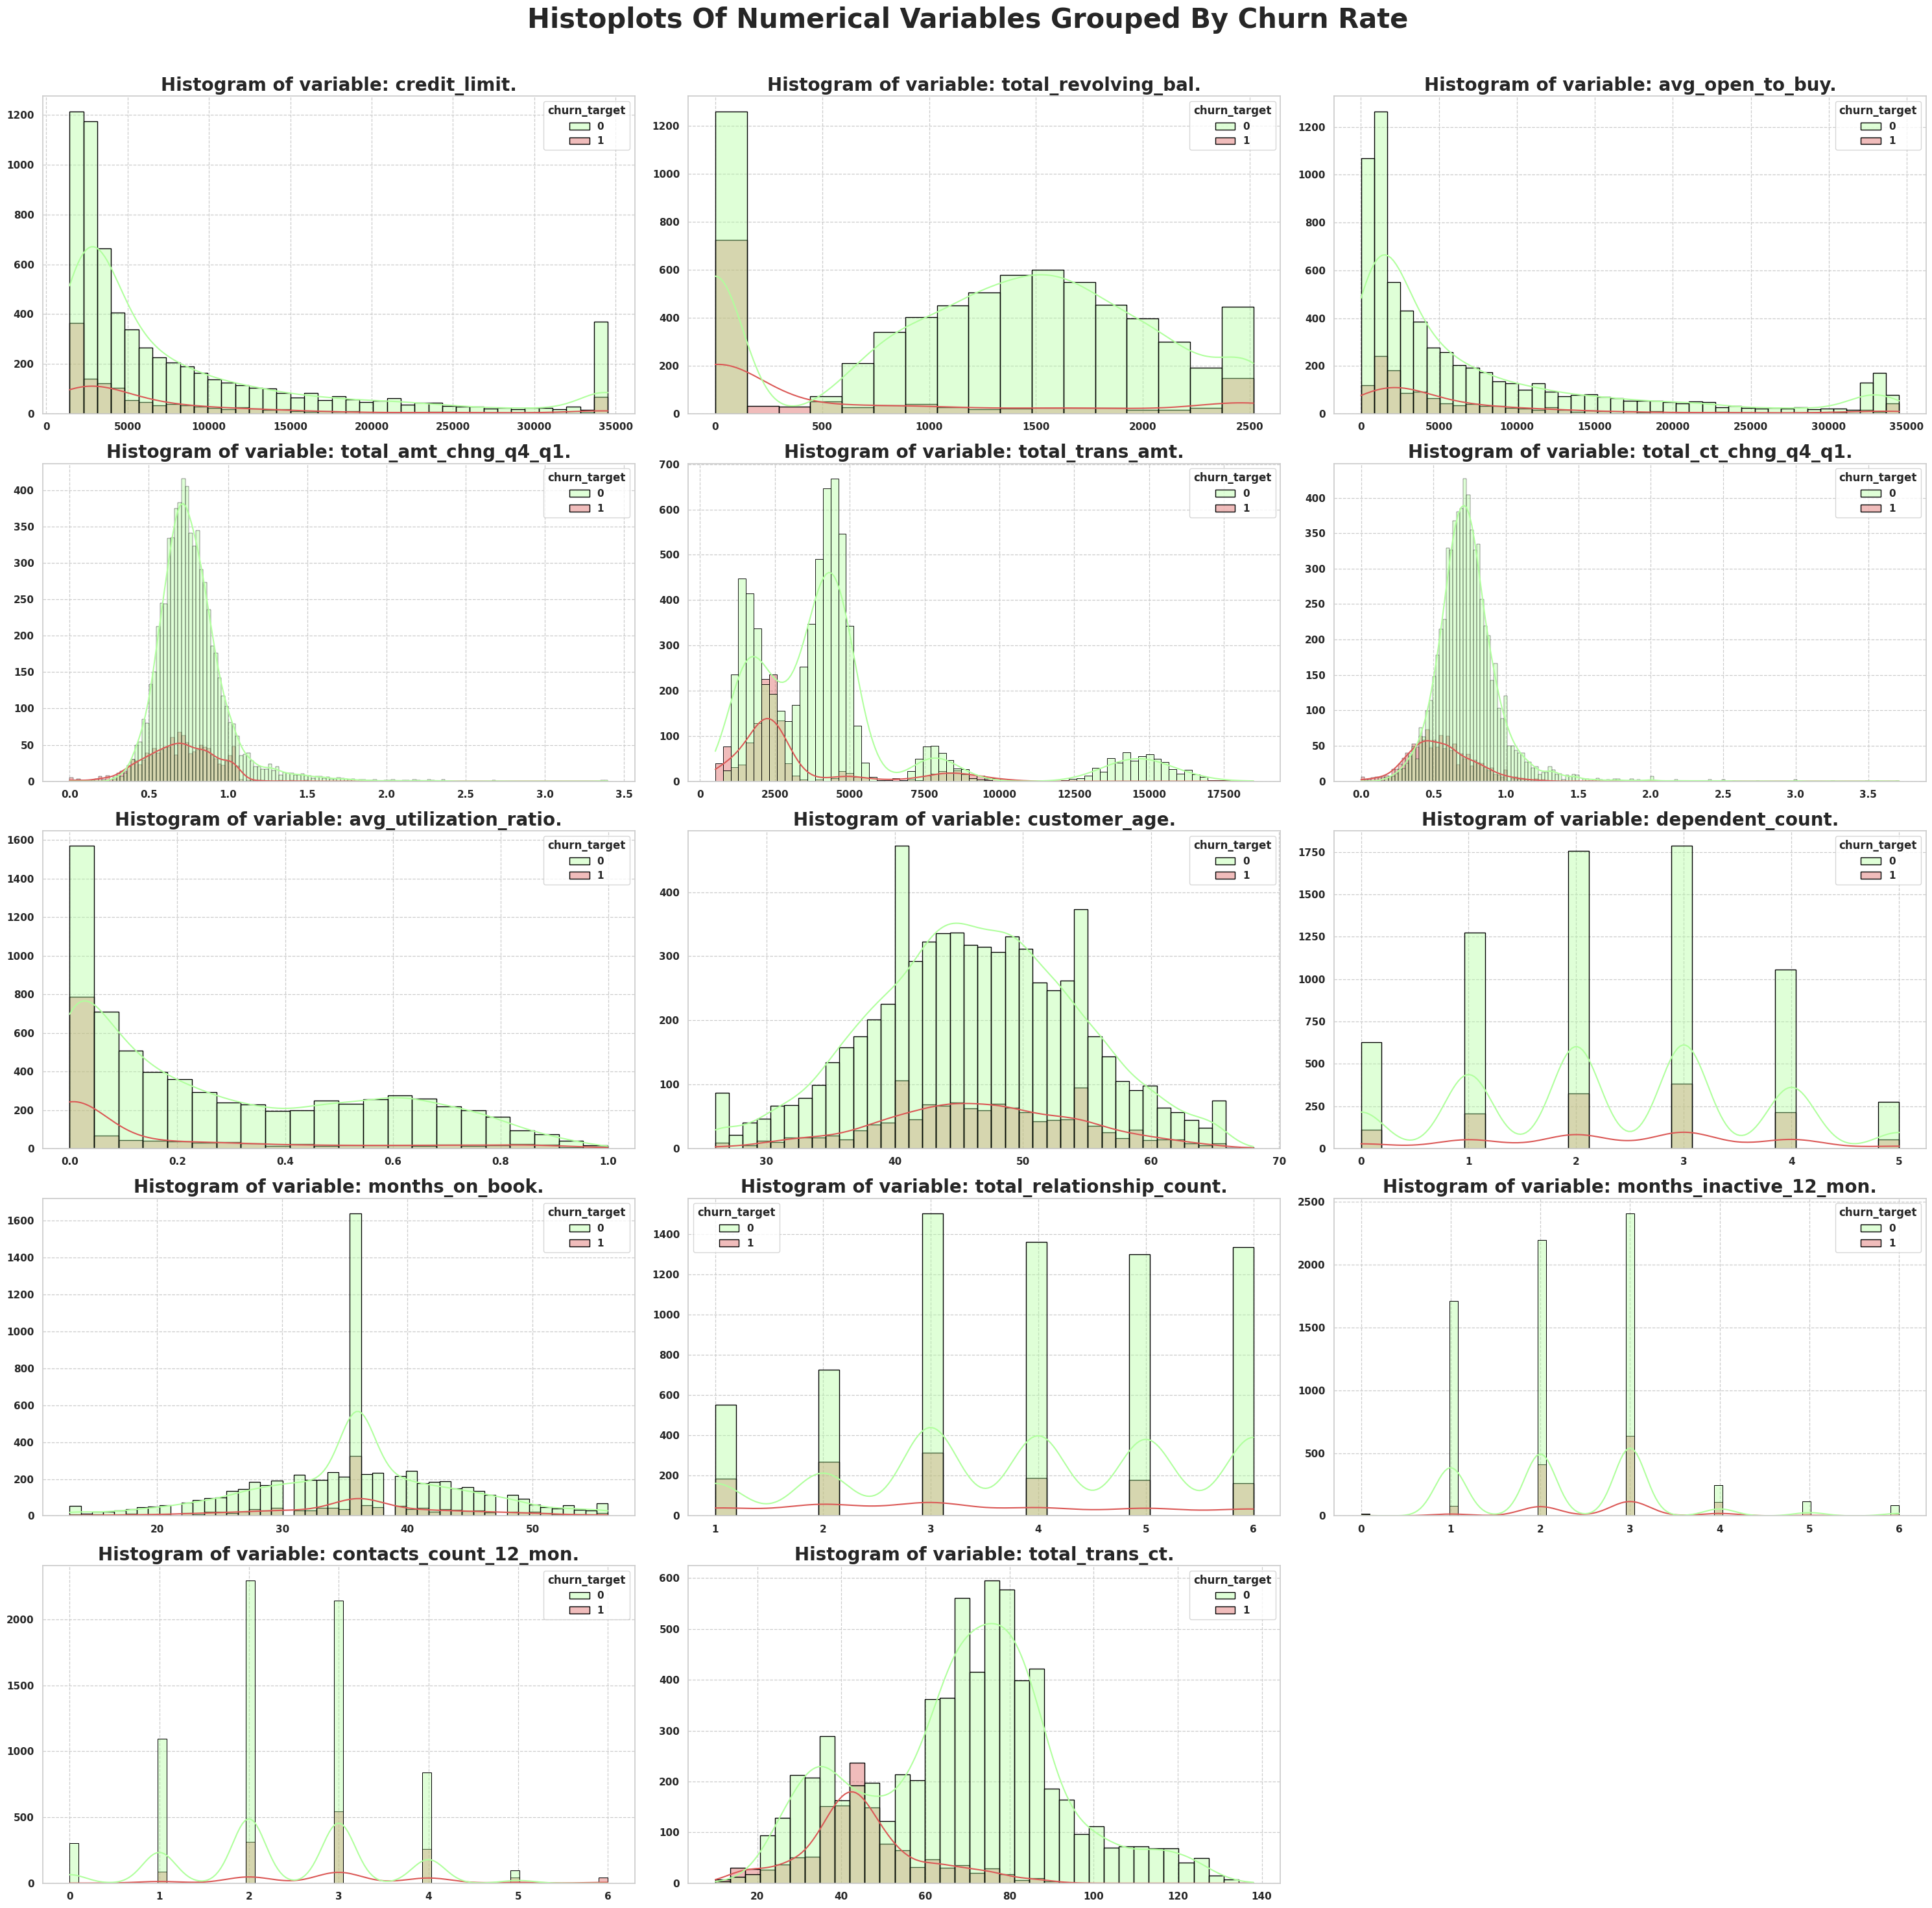

In [0]:
# Data collect
data_ax = train.select(*continuos_numerical, *discrete_numerical, 'churn_target').toPandas()
# Numerical Histograms By Churn Rate
GraphicsData(data = data_ax).numerical_histograms(
    hue = 'churn_target',
    title='Histoplots Of Numerical Variables Grouped By Churn Rate'
)

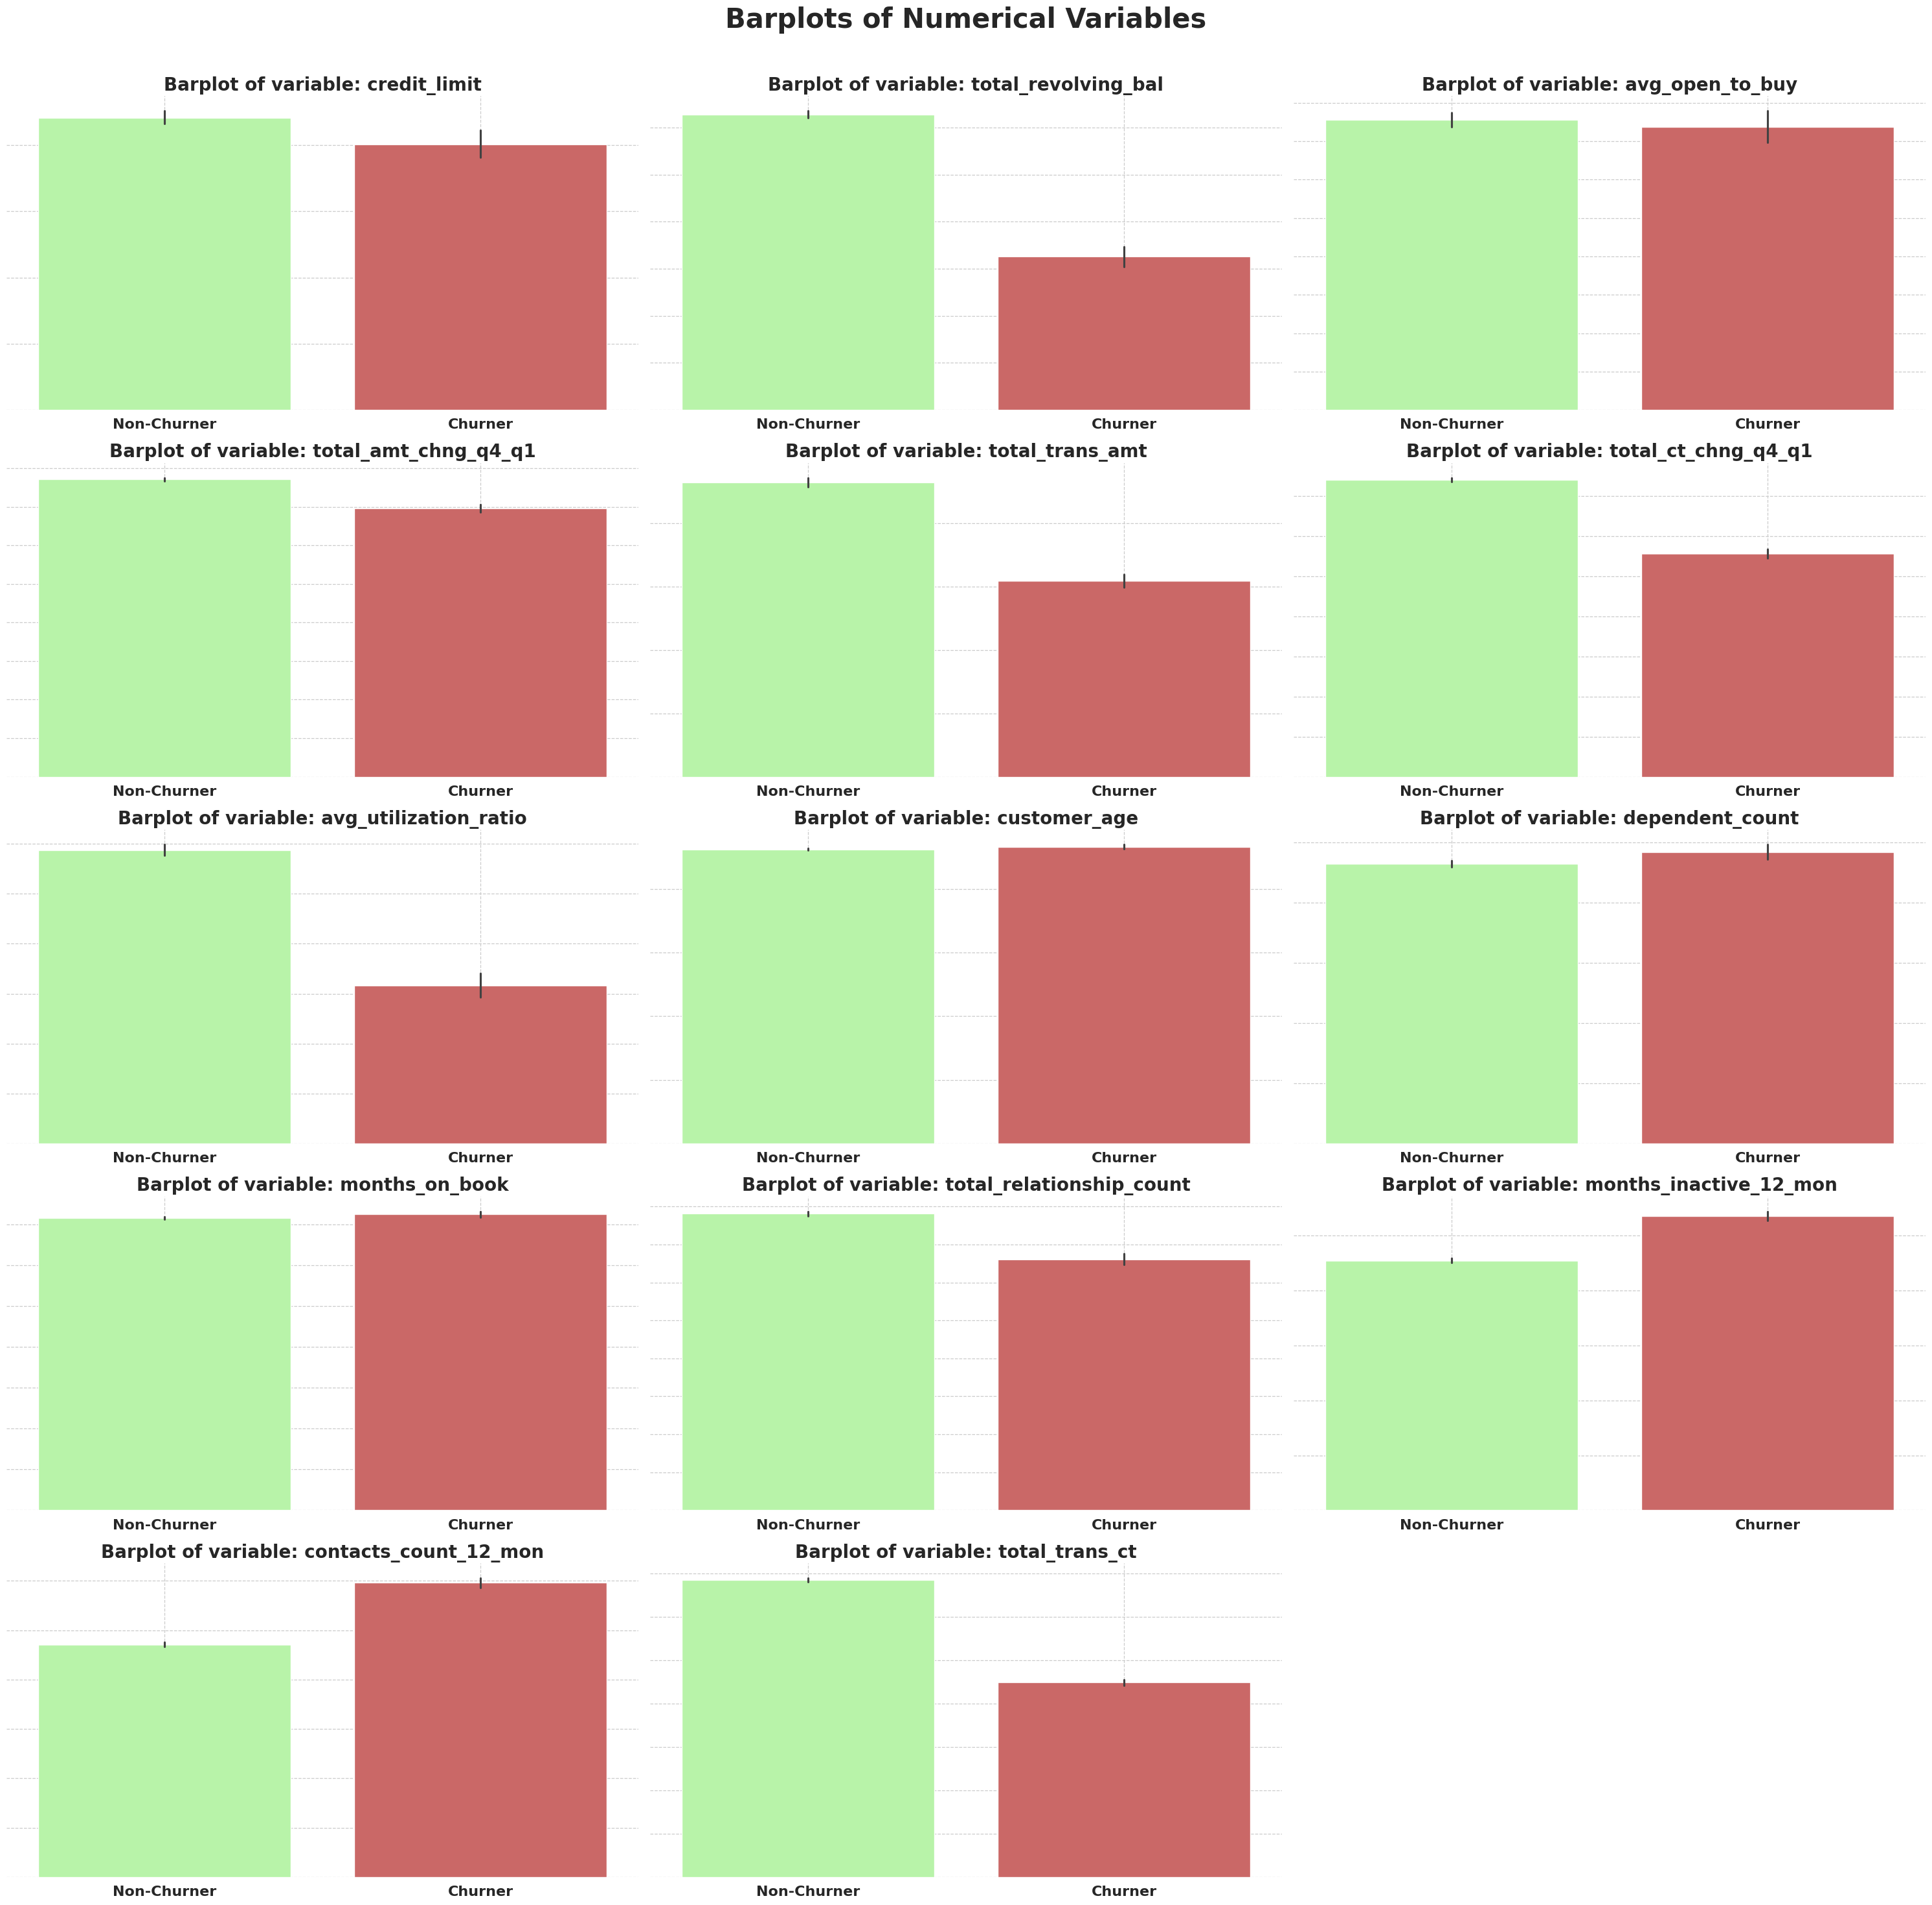

In [0]:
GraphicsData(data_ax).numerical_barplots(hue = 'churn_target', legend = ['Non-Churner', 'Churner'])

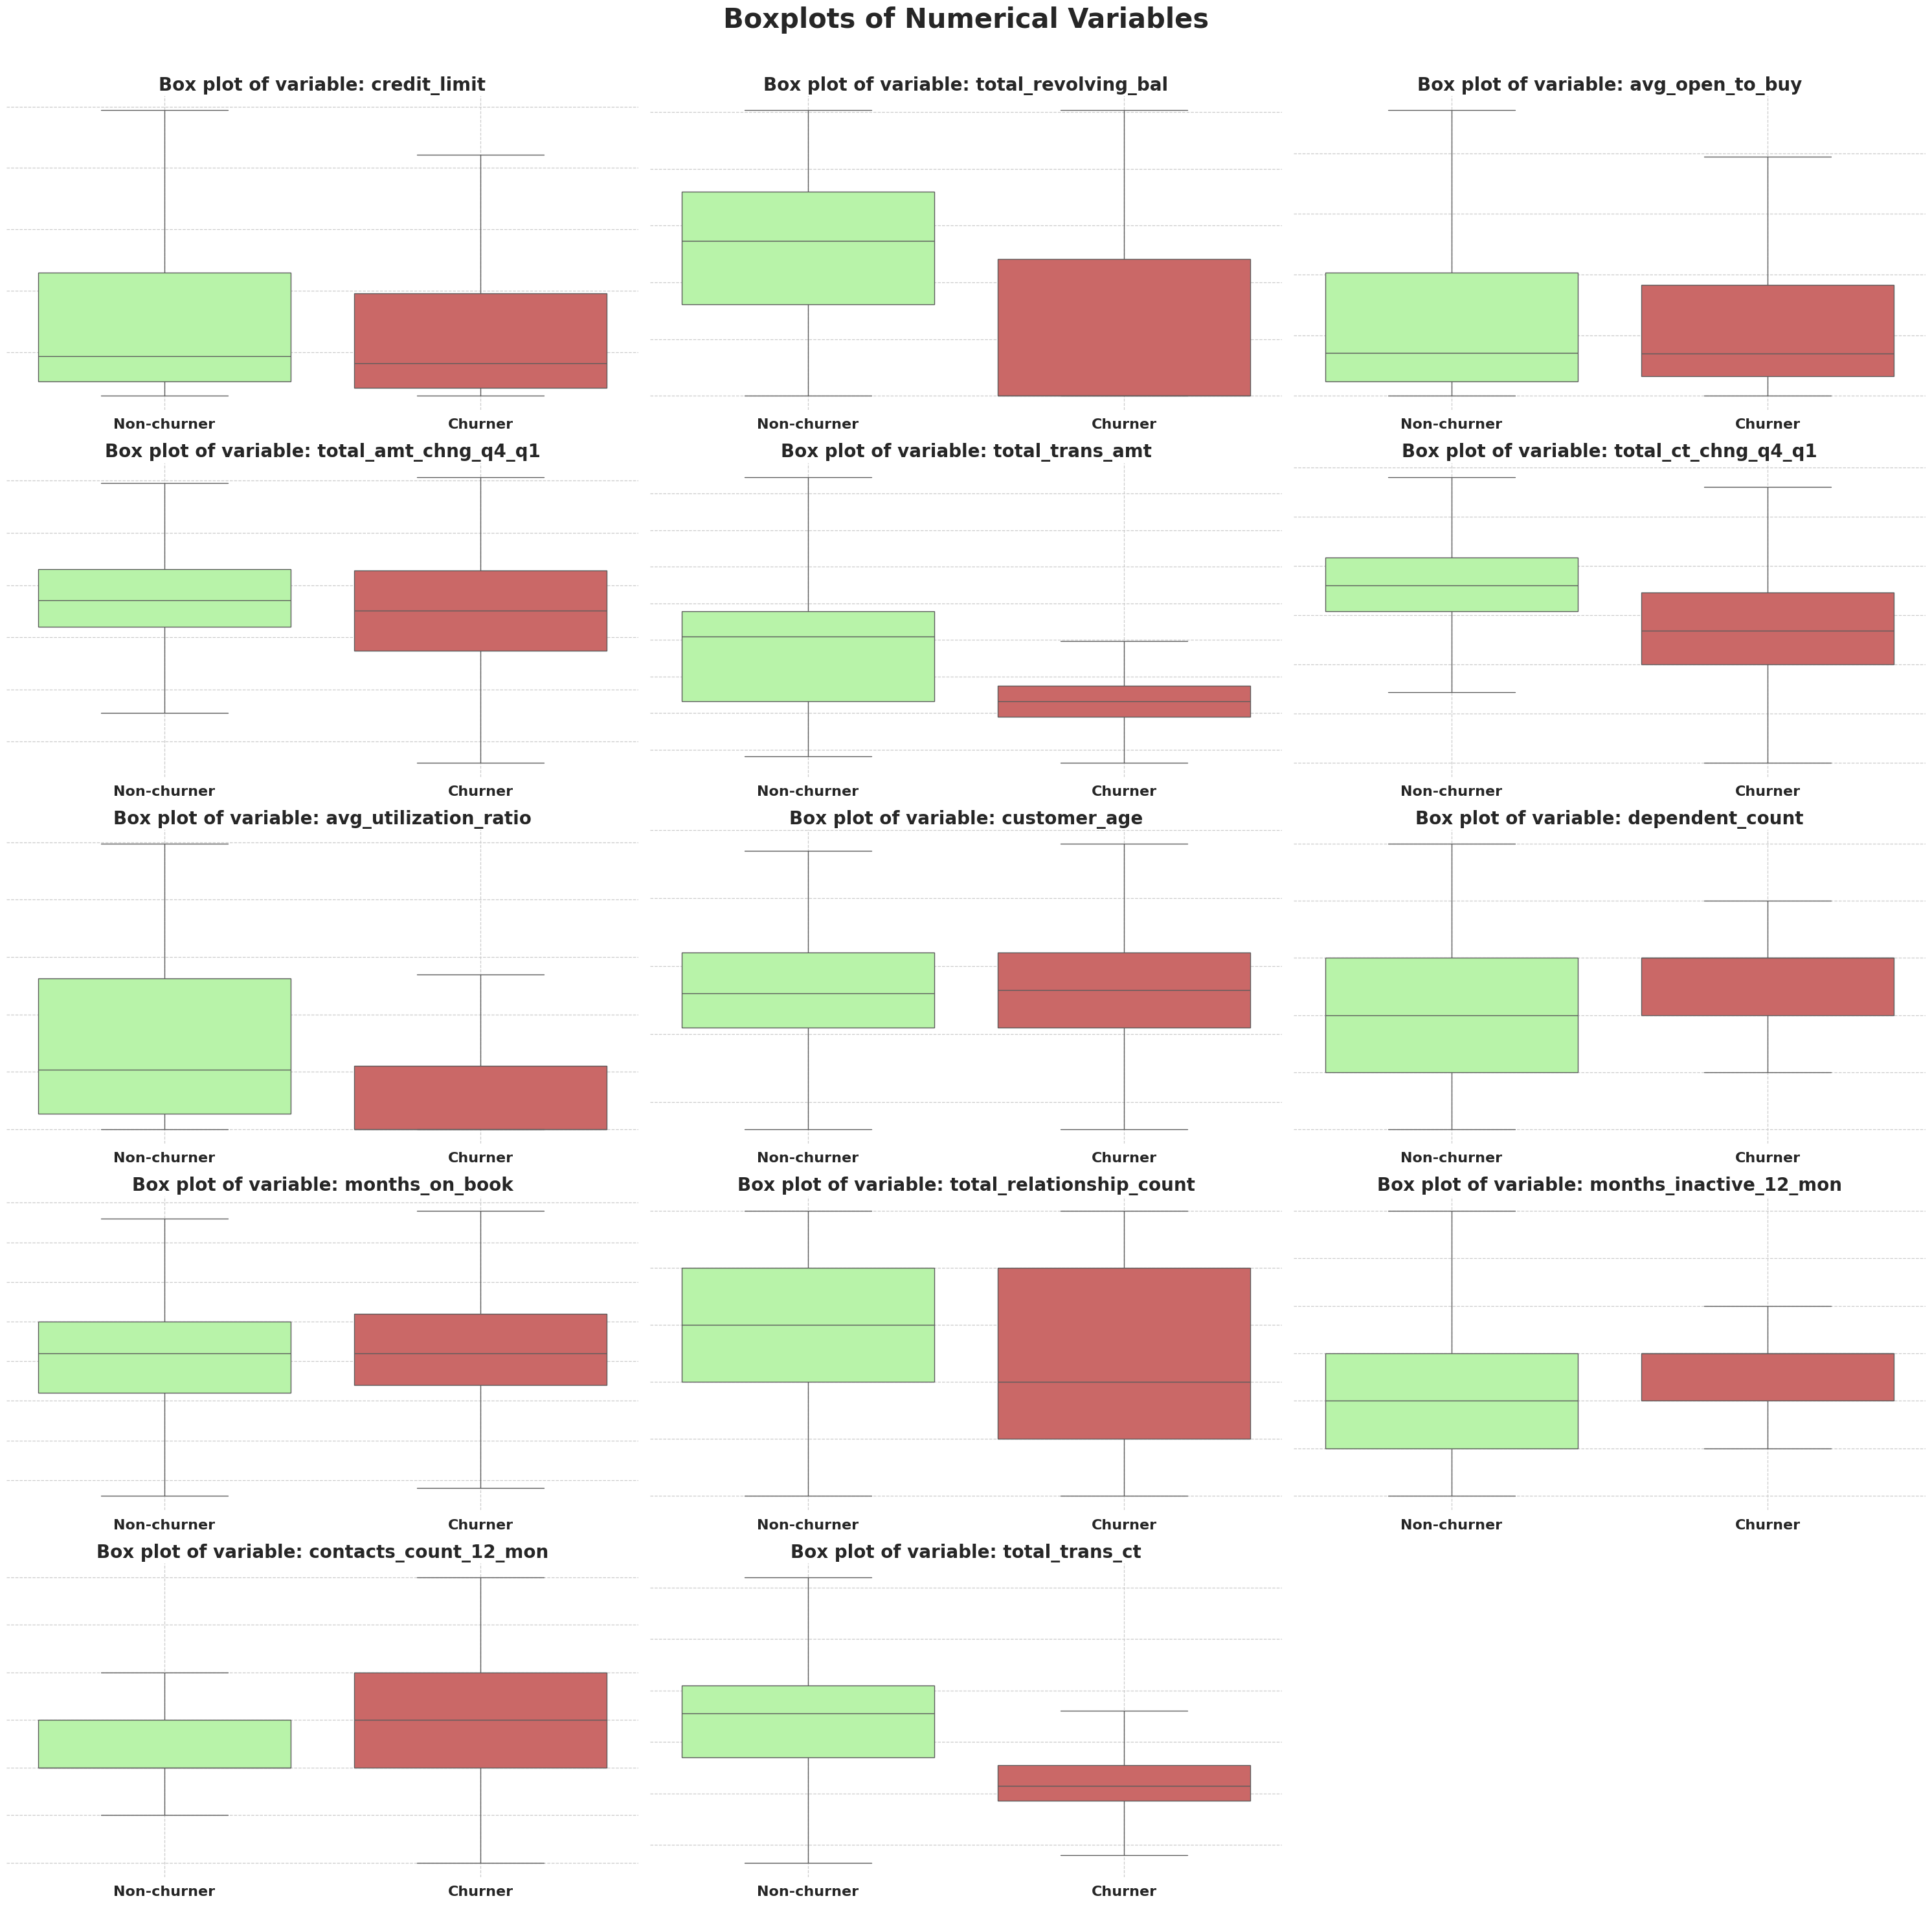

In [0]:
GraphicsData(data_ax).numerical_boxplots(hue = 'churn_target', legend = ['Non-churner', 'Churner'])


#### Observations and insights into the of numeric variables with the 'churn_target' variable.
---
- 1 - In the variable **total_revolving_bal**, it is possible to observe that a greater distribution of customers who stopped using their credit card is in the **lowest revolving balance values**. A significant portion of these customers have a revolving balance **below \$500**.
---
- 2 - In the variable **total_trans_amt**, it is possible to observe that customers who stopped using their credit card have a greater distribution in the **lower transfer values**. Most of these customers made a total of **transfers below \$2750**.
---
- 3 - In the variable **total_ct_chng_q4_q1**, it is possible to observe that most customers who kept their credit card service active had an increase of at least **50%** in the number of transactions carried out in relation to Q4 and Q1.
---
- 4 - In the **avg_utilization_ratio** variable, it is possible to observe that most customers who stopped using their credit card have practically **not used their credit card limit** in the last few months.
---
- 5 - In the **contacts_count_12_mon** variable, it is possible to observe that most customers who stopped using their credit card have a **number of contacts greater than or equal to 3**.
---
- 6 - In the **total_trans_ct** variable, it is possible to observe that most customers who stopped using the credit card have a number **below 80 transactions in the last 12 months**. And all customers who have **95 transactions or more** continued to use the credit card.
---
- 7 - The value of the revolving balances of customers who stopped using their credit cards is relatively lower, around **45% less**, than that of customers who continued using their credit cards.
---
- 8 - The total transfer values ​​in recent months are lower for customers who stopped using their credit cards.
---
- 9 - Customers who continued using their credit cards have a reasonably higher number of services.
---
- 10 - Customers who stopped using their credit cards have a higher number of inactive months and a higher number of contacts in the last 12 months.
---
- 11 - Customers who stopped using their credit cards had about **34% fewer transactions** compared to customers who continued using their credit card service in the last 12 months.
---

#### Checking the relationship of categorical variables with the cause of the problem
---

- Checking the statistical relationship of categorical variables using the Chi-Square Test

- **Note**:
To submit categorical variables to the Chi-Square Test it will be necessary to index them first.

---

In [0]:
train_idx = train.select(*ordinal_categorical, *nominal_categorical, 'churn_target') \
    .withColumn('education_level', 
                F.when(F.col('education_level') == 'Unknown', 0)
                .when(F.col('education_level') == 'Uneducated', 1)
                .when(F.col('education_level') == 'High School', 2)
                .when(F.col('education_level') == 'College', 3)
                .when(F.col('education_level') == 'Graduate', 4)
                .when(F.col('education_level') == 'Post-Graduate', 5)
                .when(F.col('education_level') == 'Doctorate', 6)
                .otherwise(None)
                .cast(IntegerType())
    ) \
    .withColumn('income_category', 
                F.when(F.col('income_category') == 'Unknown', 0)
                .when(F.col('income_category') == 'Less than $40K', 1)
                .when(F.col('income_category') == '$40K - $60K', 2)
                .when(F.col('income_category') == '$60K - $80K', 3) 
                .when(F.col('income_category') == '$80K - $120K', 4)
                .when(F.col('income_category') == '$120K +', 5)
                .otherwise(None)
                .cast(IntegerType())
    ) \
    .withColumn('card_category', 
                F.when(F.col('card_category') == 'Blue', 0)
                .when(F.col('card_category') == 'Silver', 1)
                .when(F.col('card_category') == 'Gold', 2)
                .when(F.col('card_category') == 'Platinum', 3)
                .otherwise(None)
                .cast(IntegerType())
    ) \
    .withColumn('gender', 
                F.when(F.col('gender') == 'F', 0)
                .when(F.col('gender') == 'M', 1)
                .otherwise(None)
                .cast(IntegerType())
    ) \
    .withColumn('marital_status', 
                F.when(F.col('marital_status') == 'Unknown', 0)
                .when(F.col('marital_status') == 'Single', 1)
                .when(F.col('marital_status') == 'Married', 2)
                .when(F.col('marital_status') == 'Divorced', 3)
                .otherwise(None)
                .cast(IntegerType())
    )


train_idx.limit(3).display()

education_level income_category card_category gender marital_status churn_target 4 2 0 0 1 0 4 2 0 0 1 0 4 2 0 0 1 0

In [0]:
train_idx = train_idx.toPandas()
x = train_idx[['education_level', 'income_category', 'card_category', 'gender','marital_status']]
y = train_idx['churn_target']

chi_stat, p_value = chi2(x, y)
chi_results = pd.DataFrame({
    'cat_variables': x.columns,
    'chi_score': chi_stat, 
    'p_value': p_value
  })
chi_results

cat_variables  chi_score   p_value
0  education_level   0.197450  0.656787
1  income_category   2.655030  0.103223
2    card_category   0.035203  0.851171
3           gender   8.046963  0.004558
4   marital_status   0.357633  0.549824

#### Observations and insights on the Chi-Square Test of category variables with the 'churn_target' variable.
---
- Initially, the statistical tests used on the categorical variables showed that they did not have much of a relationship with the churn rate.
---
- The variable **gender** showed a significant relationship if we consider its p_value, but its chi_score is too low to be considered statistically relevant.
---

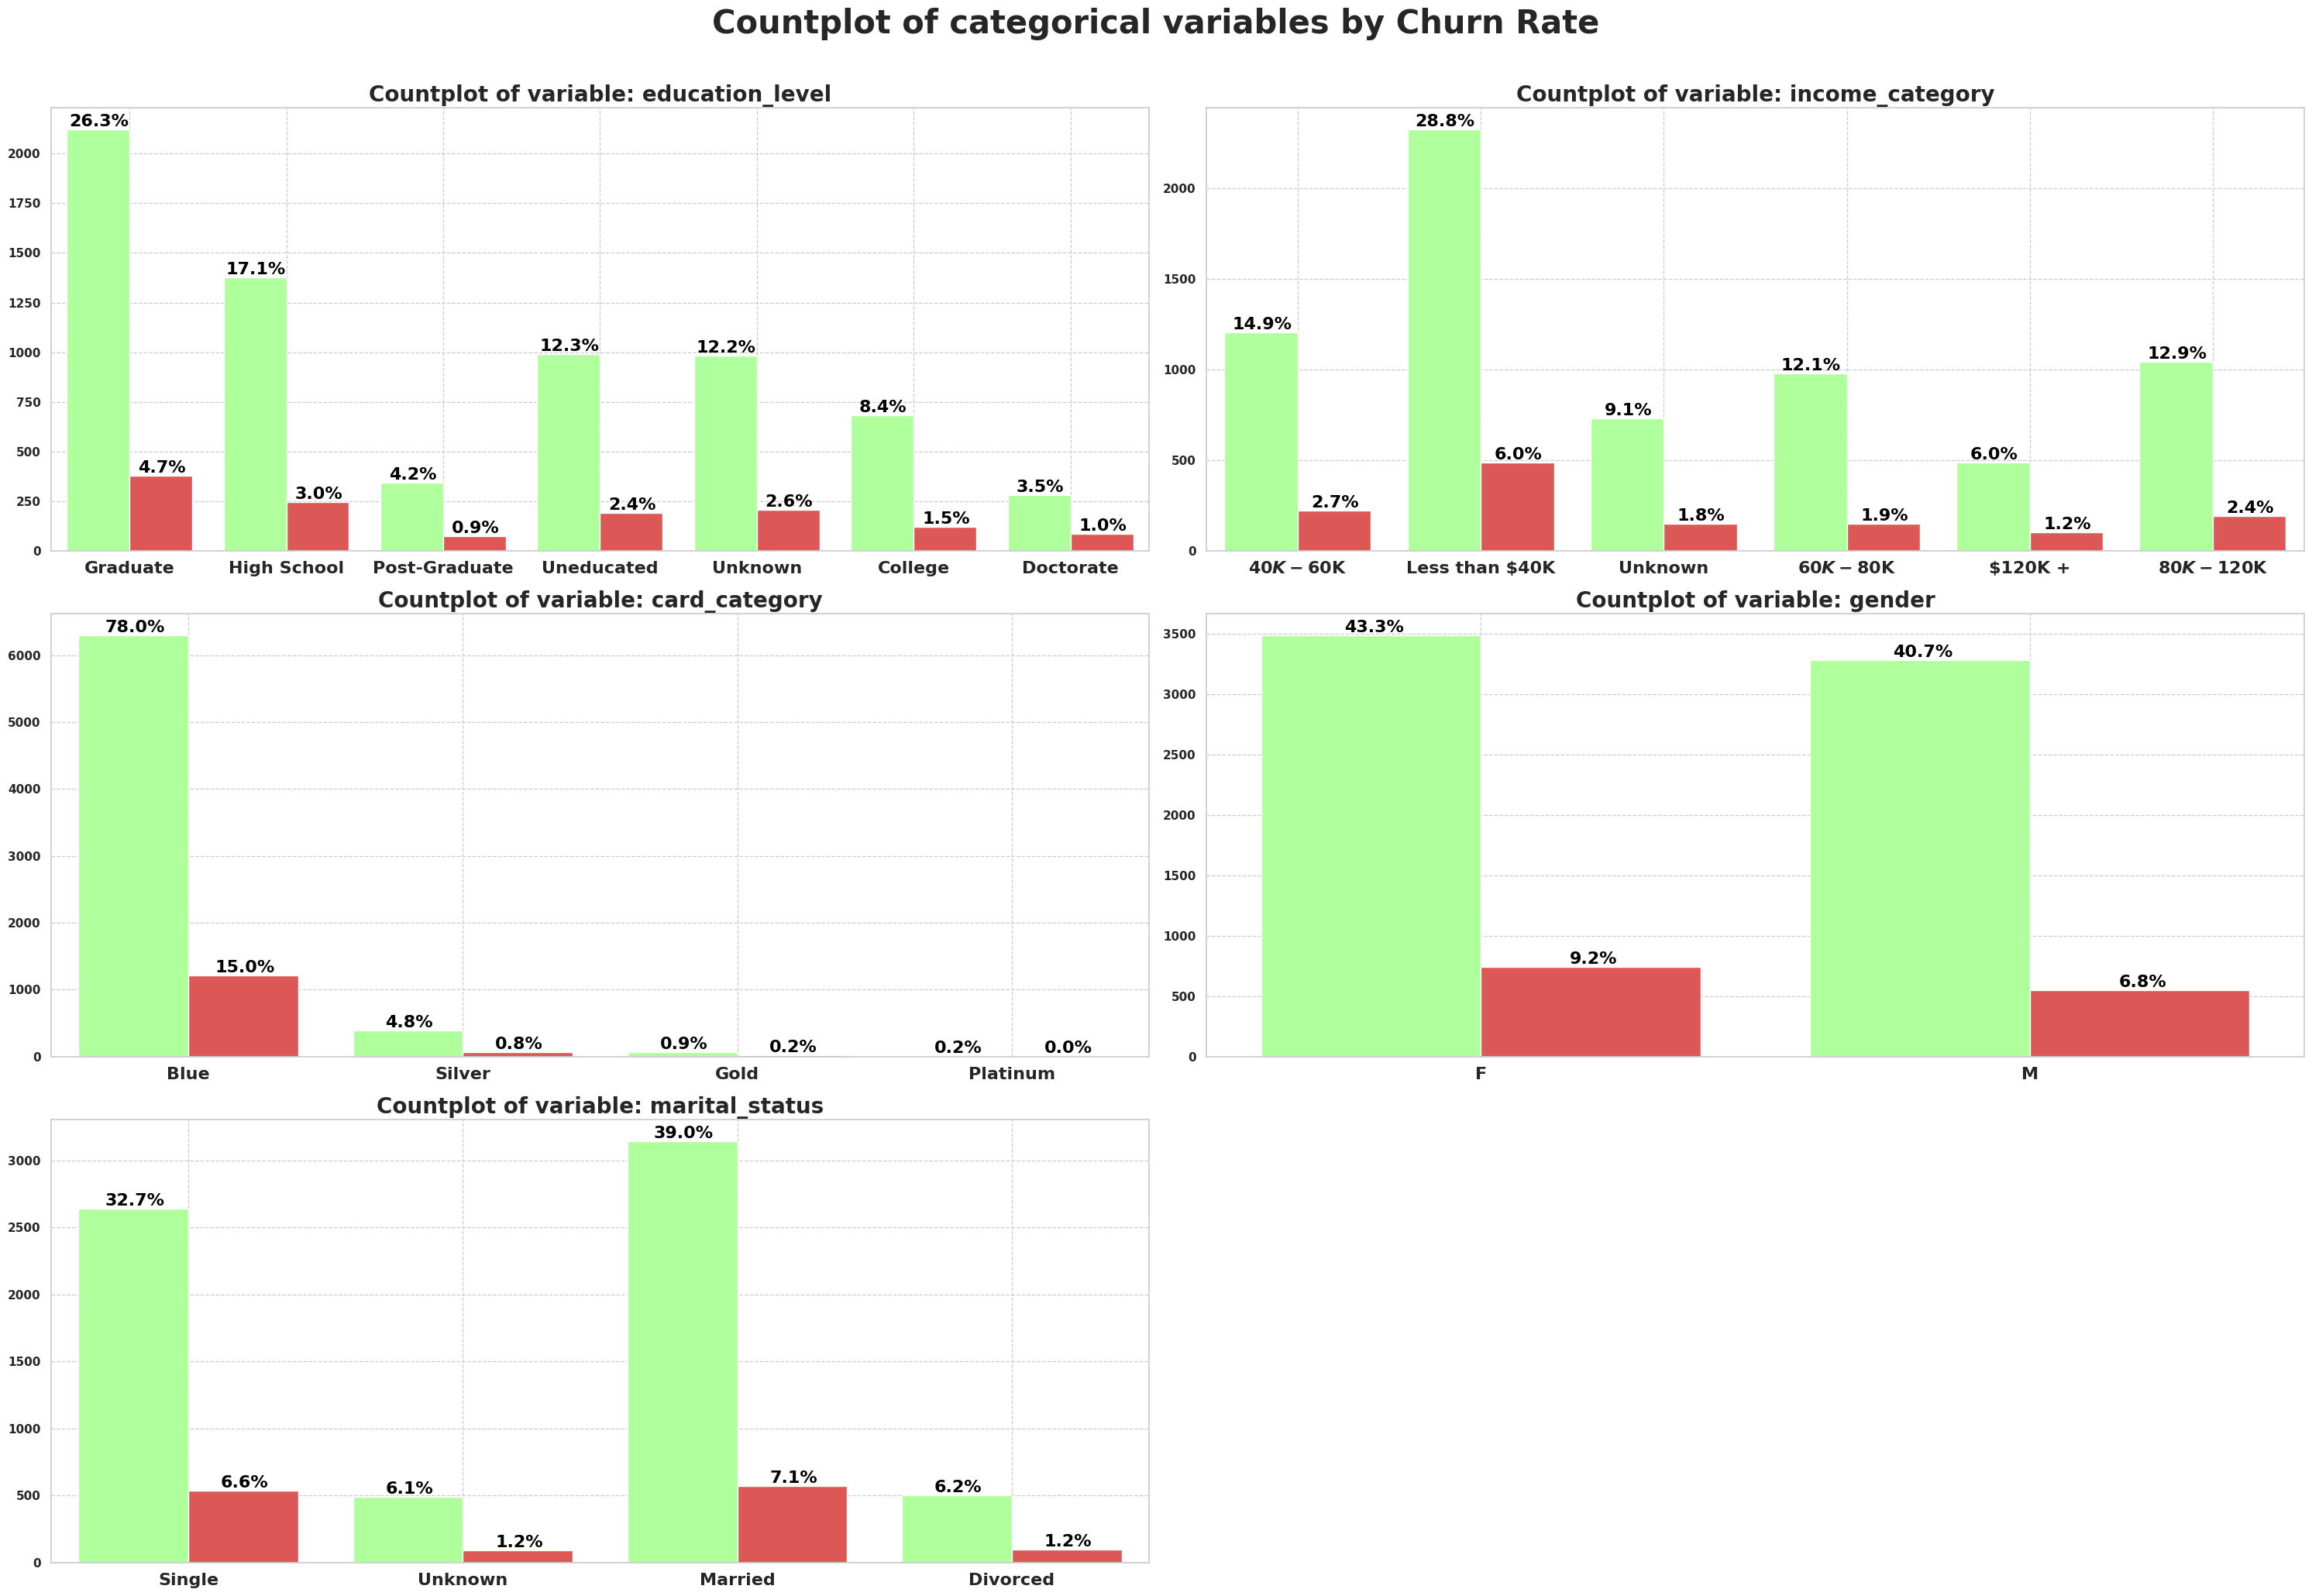

In [0]:
# Data collect
data_ax = train.select(*ordinal_categorical, *nominal_categorical, 'churn_target').toPandas()
# Categorical Countplots by Churn
GraphicsData(data_ax).categorical_countplots(
    hue = 'churn_target',
    title = 'Countplot of categorical variables by Churn Rate',
)

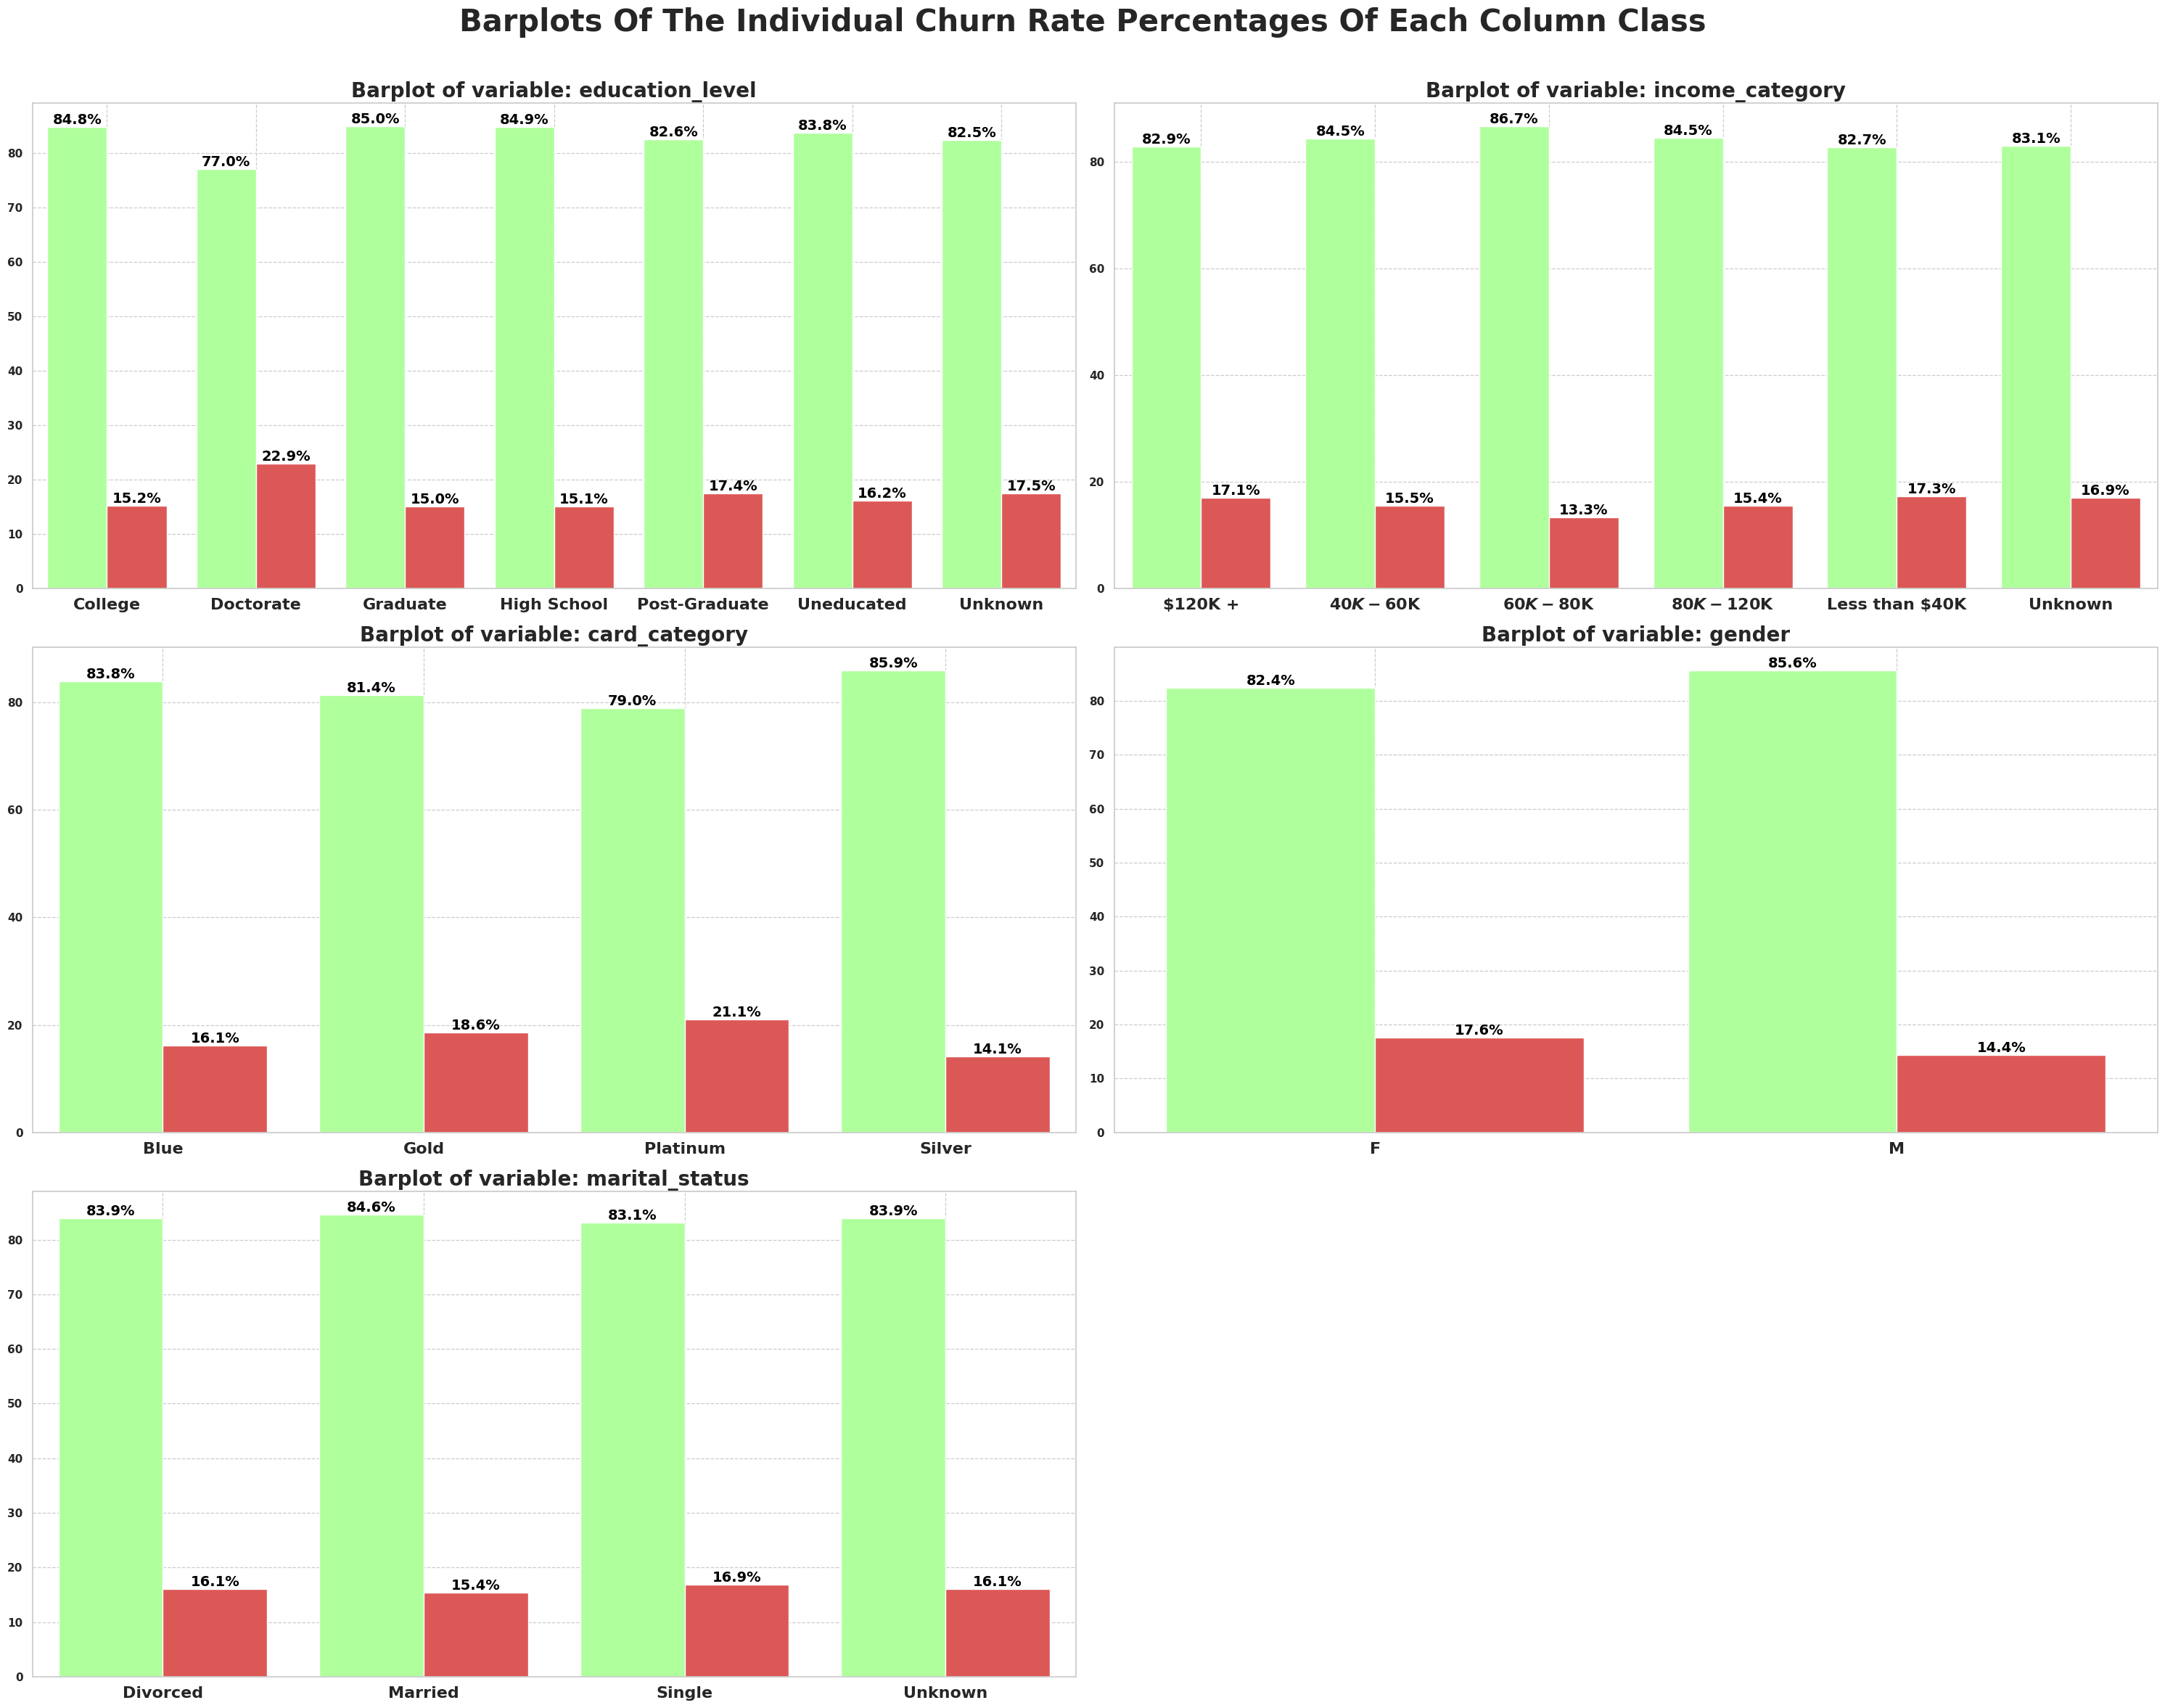

In [0]:
GraphicsData(data_ax).categorical_bar_percentages(
    hue = 'churn_target',
    title = 'Barplots Of The Individual Churn Rate Percentages Of Each Column Class'
)

#### Observations and insights on categorical variables with the 'churn_target' variable
---
- 1 - The **level of education** does not demonstrate a very strong relationship with the rate of customers who stopped using credit card services. Considering that this variable is classified according to the levels of education, it was expected that the higher or lower the level of education, the more likely these customers would choose to continue using the credit card service.

- However, it is possible to draw some observations regarding this data, as it directly affects the institution's possible decision-making.
- The level of education with the highest churn rate is the **Doctorate**, with around **22.9%**. The lowest rates are the **Graduate** levels, with **15%**, and **High School**, with **15.1%** of churn rate.
---
- 2 - **Customers' annual income** does not have a significant influence on the rate of customers who stopped using their credit cards, as all salary ranges follow a practically similar distribution in relation to the churn rate index. Only customers with a salary range of **60k - 80k** had a churn rate of **13.3%**, which is slightly lower compared to the other salary ranges.
---
- 3 - The **credit card category** shows a significant relationship with the rate of customers who stopped using their credit cards. The **Gold** and **Platinum** categories had a higher-than-average rate of credit card service cancellations compared to the other categories. However, these two categories represent a very small percentage of this data set; together, they do not even have a **2%** share in relation to the other categories.
---
- 4 - The **Silver** category is the category with the lowest rate of credit card service cancellations **with a 14.1% churn rate**.
---
- 5 - Considering the data from this banking institution, it is possible to conclude that the rate of customers with the **Silver**, **Gold** and **Platinum** card brands is very low. We have **93%** of customers with the initial brand, which is the basic **Azul** card. It would be of great value for this institution to invest in a more flexible policy in its card categories. Offering more benefits to its customers and differentiated services through the **Silver**, **Gold** and **Platinum** brands can increase the loyalty rate of its customers.
---
- 6 - The **gender** of customers declared to have a specific relationship with the churn rate. Women reported having a higher rate of cancellation of the card service than men.
---
- 7 - The **relationship status** is graphically revealed to have a specific relationship with the churn rate indexes. **Married customers** have a **slightly lower** churn rate index than **single customers**.
---
- 8 - Initially considering the statistical data and graphs of these categorical variables, it is possible to conclude that they do not have a satisfactory relevance in solving the problem of this institution, which would be the turnover rate. However, we have some variables that somehow present some differences in their classes regarding the churn rate index, which directly affect these variables is the distorted distribution of these variables such as **marital_status and card_category**.
---
- 9 - At first, I will be keeping these variables and I will analyze their performance during the pre-training process of the models and I will see if it is viable to keep them or discard them.

---

### Multivariate Analysis


#### Checking the relationship of the numeric variables together with the total_trans_ct variable with the churn_target variable

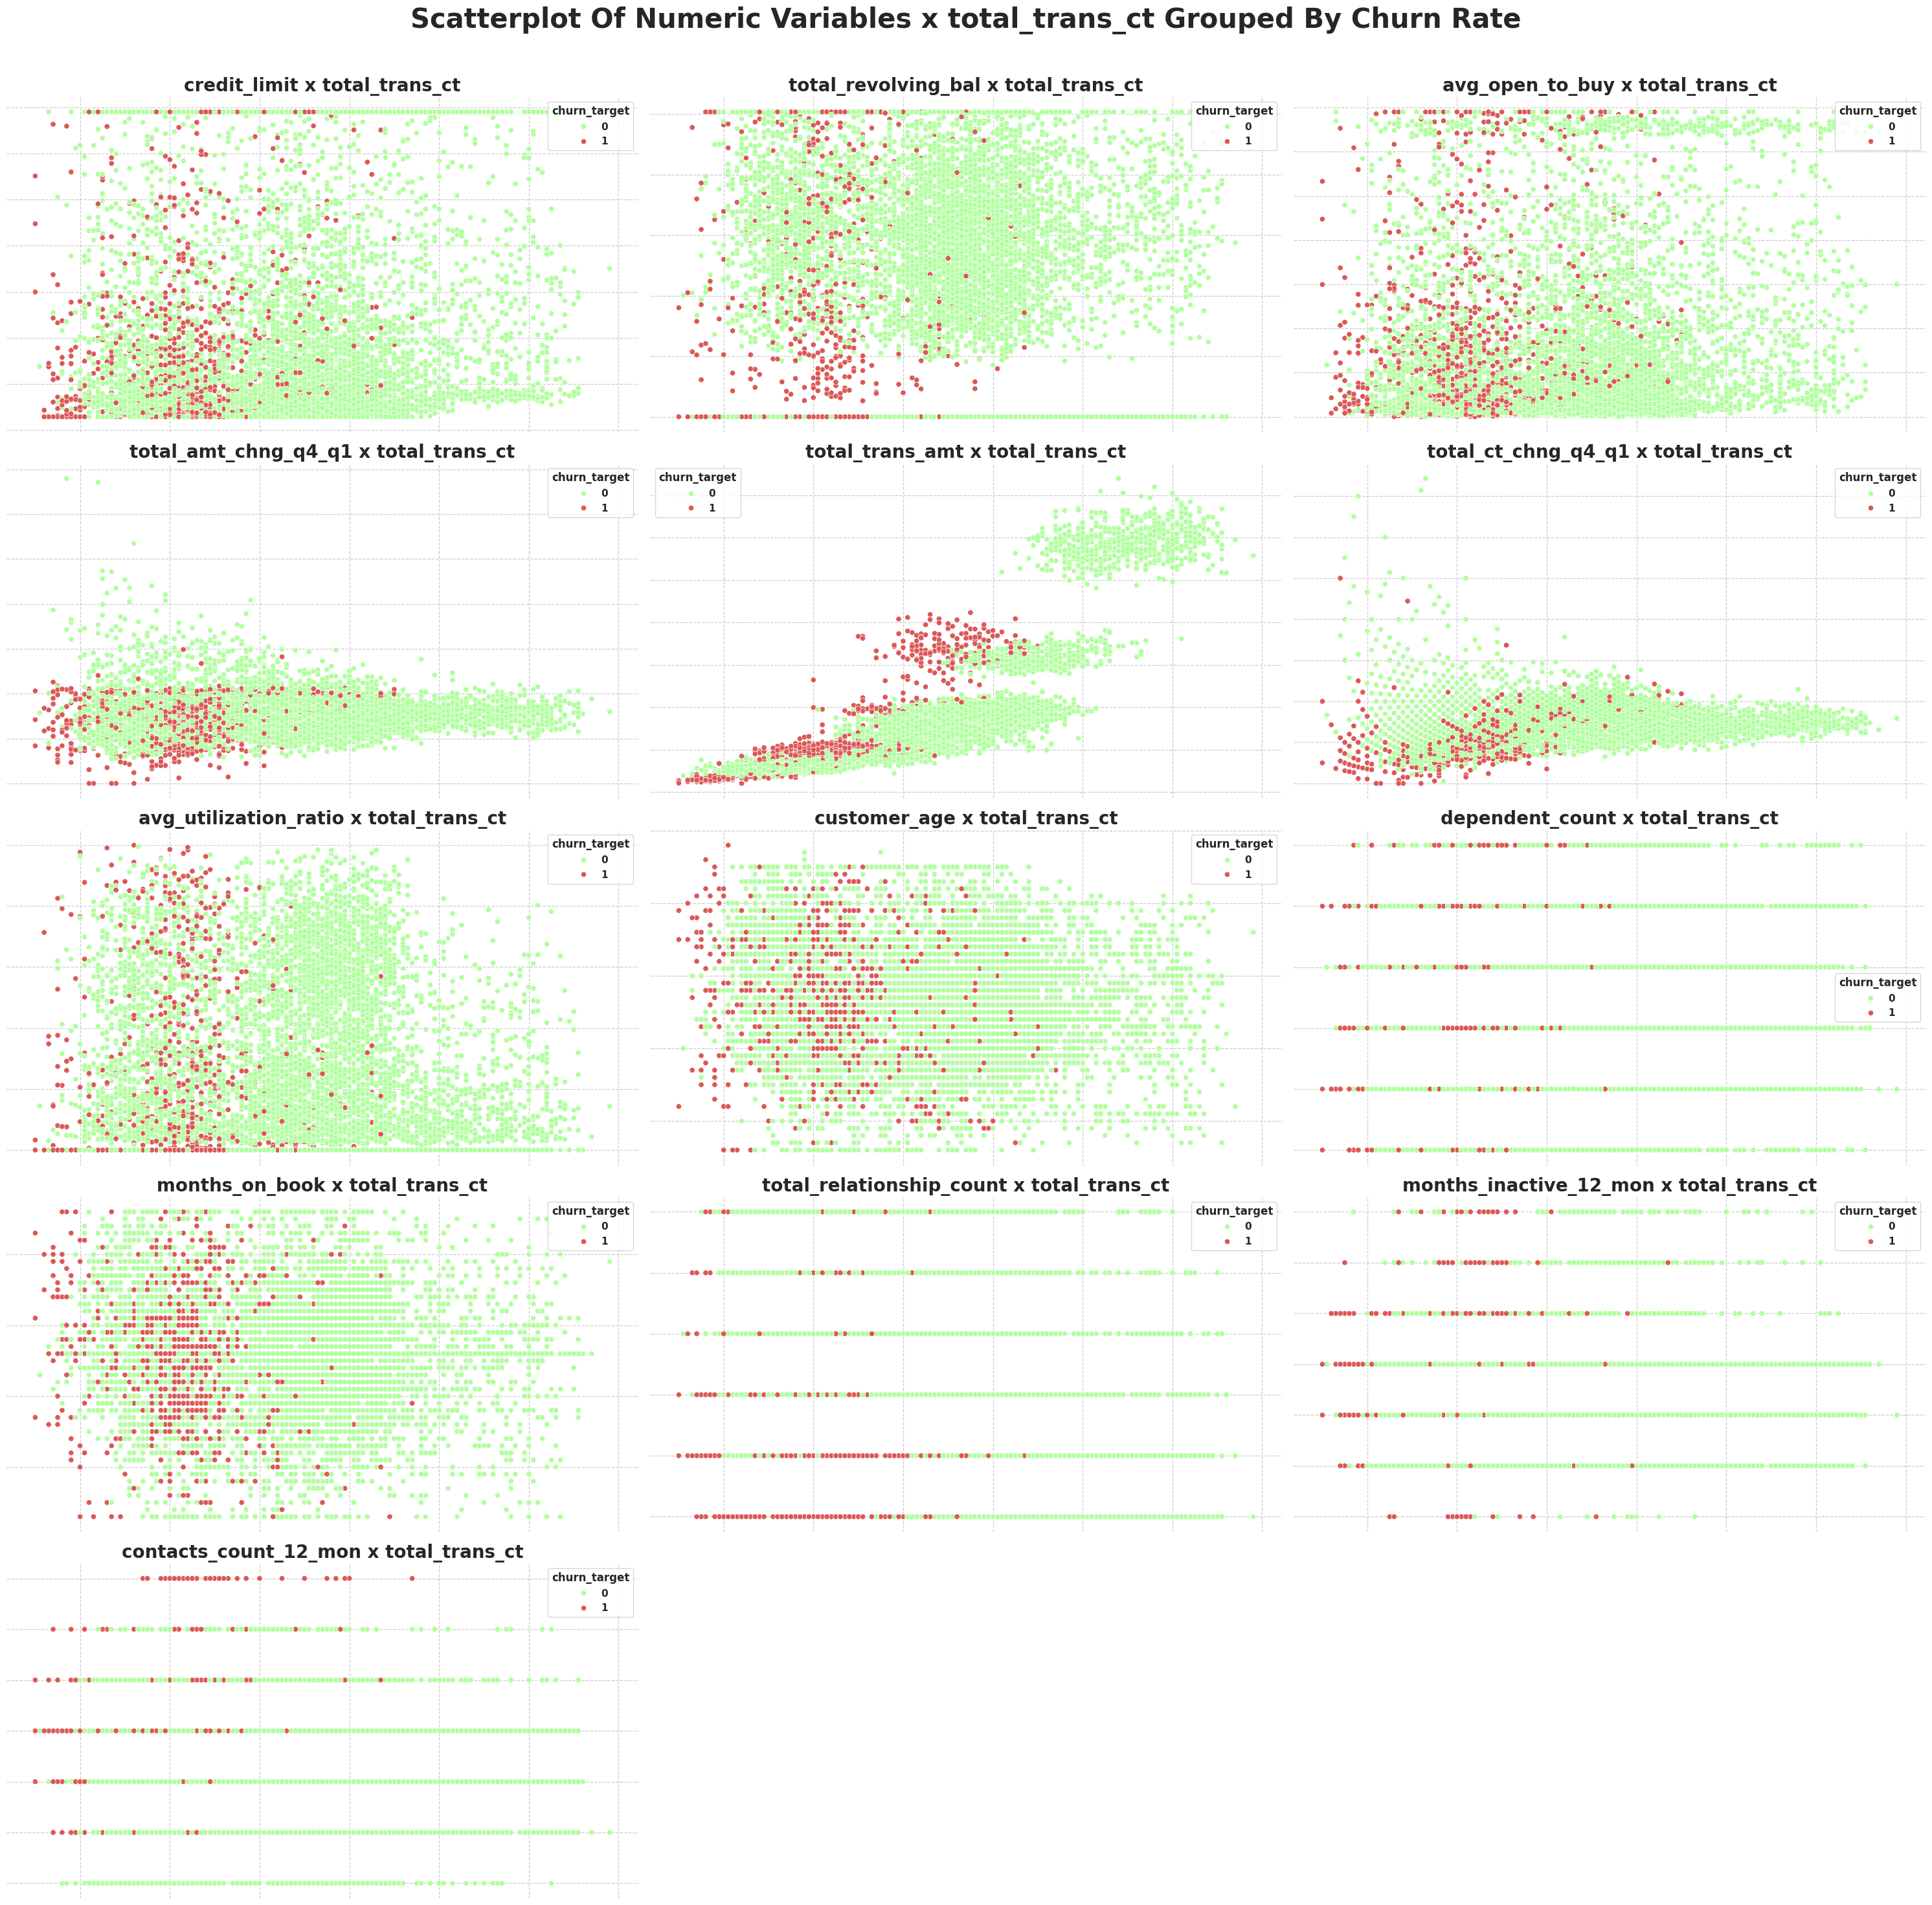

In [0]:
# Data collect
data_ax = train.select(*continuos_numerical, *discrete_numerical, 'churn_target').toPandas()
# Scatterplots vs total_trans_ct Grouped By Churn Rate
GraphicsData(data_ax).scatterplots_vs_reference(
    x_reference = 'total_trans_ct',
    hue = 'churn_target',
    title = 'Scatterplot Of Numeric Variables x total_trans_ct Grouped By Churn Rate'
)


#### Observations and insights into the of numeric variables x  total_trans_ct with the 'churn_target' variable.
---
- 1 - The variable **total_trans_ct** has a very strong correlation with the variable **churn_target**. Therefore, I chose to check its dispersion with the other variables, grouped by the target variable **churn_target**.

The combinations that best defined a good separation between **Non_churners** and **Churners** customers were:

- **total_trans_ct** x **total_trans_amt**
- **total_trans_ct** x **total_ct_chng_q4_q1**
- **total_trans_ct** x **total_ct_chng_q4_q1**

These variables refer to the quantity or total value of transactions, reinforcing the previous observations that the number of transactions and their total value reflect, in a certain way, the possible behavior of the customer, indicating whether he or she will continue to use the credit card or stop using it.

---
- 2 - The variables **total_revolving_bal** and **avg_utilization_ratio**, together with the variable **total_trans_ct**, had a reasonable separation of the **Churn** and **Non-churn** classes, although there was a greater dispersion in the graphs of these two variables.

---


#### Hypothesis testing H0 and H1

- I will be considering the main variables that in the analyses demonstrated to have a significant relationship with the churn rate indices of this banking institution.

In [0]:
train_h_test = train.toPandas()

##### Hypothesis test with the variable: total_trans_ct

In [0]:
ttest_between_groups(
    data = train_h_test,
    numerical_col = 'total_trans_ct',
    group_col = 'churn_target',   
)


🟢 t-statistic: -48.10186
🔵 p-value: 0.00000
----------------------------------------------------------------------

✅ Null Hypothesis (H0) Rejected!
There is a significant difference in 'total_trans_ct'
between the two groups (1 vs 0).


##### Hypothesis test with the variable: total_trans_amt

In [0]:
ttest_between_groups(
    data = train_h_test,
    numerical_col = 'total_trans_amt',
    group_col = 'churn_target',   
)


🟢 t-statistic: -20.07730
🔵 p-value: 0.00000
----------------------------------------------------------------------

✅ Null Hypothesis (H0) Rejected!
There is a significant difference in 'total_trans_amt'
between the two groups (1 vs 0).


##### Hypothesis test with the variable: total_revolving_bal

In [0]:
ttest_between_groups(
    data = train_h_test,
    numerical_col = 'total_revolving_bal',
    group_col = 'churn_target',   
)


🟢 t-statistic: -22.45297
🔵 p-value: 0.00000
----------------------------------------------------------------------

✅ Null Hypothesis (H0) Rejected!
There is a significant difference in 'total_revolving_bal'
between the two groups (1 vs 0).


##### Hypothesis test with the variable: avg_utilization_ratio

In [0]:
ttest_between_groups(
    data = train_h_test,
    numerical_col = 'avg_utilization_ratio',
    group_col = 'churn_target',   
)


🟢 t-statistic: -17.00306
🔵 p-value: 0.00000
----------------------------------------------------------------------

✅ Null Hypothesis (H0) Rejected!
There is a significant difference in 'avg_utilization_ratio'
between the two groups (1 vs 0).


##### Hypothesis test with the variable: total_relationship_count

In [0]:
ttest_between_groups(
    data = train_h_test,
    numerical_col = 'total_relationship_count',
    group_col = 'churn_target',   
)


🟢 t-statistic: -12.63615
🔵 p-value: 0.00000
----------------------------------------------------------------------

✅ Null Hypothesis (H0) Rejected!
There is a significant difference in 'total_relationship_count'
between the two groups (1 vs 0).


##### Hypothesis test with the variable: months_inactive_12_mon

In [0]:
ttest_between_groups(
    data = train_h_test,
    numerical_col = 'months_inactive_12_mon',
    group_col = 'churn_target',   
)


🟢 t-statistic: 14.34114
🔵 p-value: 0.00000
----------------------------------------------------------------------

✅ Null Hypothesis (H0) Rejected!
There is a significant difference in 'months_inactive_12_mon'
between the two groups (1 vs 0).


### Saving training and testing data
---

- Removing the **avg_open_to_buy** column as it has a perfect fit with **credit_limit**. I will choose to continue with credit_limit as it has shown to be slightly more associated with the target variable.

In [0]:
# Drop redundantes continuos variables
# Train data
train = train.drop('avg_open_to_buy')
# Test data
test = test.drop('avg_open_to_buy') 

### Gold Data Tier

In [0]:
# Train Data
# File location and type
file_location = '/Volumes/workspace/projects-data-science/churn-project-data/gold/train'
file_type = 'parquet'

# Save Train Dataset
DataSpark(spark = spark, dataframe = train, file_location = file_location).save_data(file_type = file_type)

✅ Data saved in: /Volumes/workspace/projects-data-science/churn-project-data/gold/train.


In [0]:
# Test Data
# File location and type
file_location = '/Volumes/workspace/projects-data-science/churn-project-data/gold/test'
file_type = 'parquet'

# Save Test Dataset
DataSpark(spark = spark, dataframe = test, file_location = file_location).save_data(file_type = file_type)

✅ Data saved in: /Volumes/workspace/projects-data-science/churn-project-data/gold/test.


### EDA Conclusions
---

- Through the hypothesis test, it is possible to conclude that the number of transactions made by customers using their credit cards has a significant impact on the churn rate. In the distribution graphs, it is possible to see that the number of transactions for customers who stopped using the credit card services of this institution is much lower. The average number of transactions made by **non-churner customers is almost 69**, while that of **churner customers is 45 transactions**.
---
- Also through the hypothesis test, it is possible to conclude that the total value of transactions made by customers using their credit cards has a significant impact on the churn rate. Most customers who stopped using credit card services had a total value of **transactions equal to or below \$2500**.
---
- The credit card limit utilization rate demonstrated to have a very high significance in relation to the churn rate of this institution, and this fact was validated through the hypothesis test. In this data, there is an **asymmetric distribution with a very long tail to the right**, indicating that most of the credit card limit usage values ​​are in the **lowest values**. This is something to be explored by the stakeholders of this institution, since most of its customers use a **limit much lower than expected**, which can be a problem, since most of the bank's **profits from the credit card** are associated with customer usage. Regarding this problem, we have **non-churner** customers with an **average of 29%** limit usage and **churners** with an **average of 16%** limit usage.
---
- The number of services maintained on their card by the customer has been shown to have a significant impact on the churn rate of this institution, and this was also proven in the hypothesis tests.
---
- The **credit limit of credit cards** has an **asymmetric distribution**, with most of the limits **below \$5000**. This is linked to the customer profile, as most have an annual income **below $40k**. However, the possibility of having a more flexible policy regarding limit increases can be assessed together with the institution's stakeholders, considering the default rate of its customers.
---
- The **card categories** need to be restructured with more flexible policies regarding the **Silver, Gold and Platinum categories**, as these three categories together represent **less than 7% of the total number of customers**. The **Blue card** category has **93.1% of the total number of customers**, indicating that most customers only keep the initial credit card brand. This may not be a positive factor for the bank, considering that the benefits and advantages tend to be greater than those of cards above the Blue category, and with these advantages it is natural for there to be greater and more continuous customer loyalty.
---
- Churners had a rate of **26% more contacts with the bank**, it is important for the bank to understand and seek to meet the requests of these customers.
---
- Most of this institution's customers were inactive for three months or less. And we have churners **with 18% more months of inactivity** than non-churners who continued using credit card services, indicating that customer inactivity is a problem that the bank must address and explore in potential solutions.
---